In [4]:
import numpy as np
import pandas as pd
import sys
sys.path.append('..')
from madule import simulation
from madule import plots

In [7]:
"""Generate True values of Hierarchical parameters"""
# Simulation number
simNumber = 10

"Set mean and STD of Learning rate for Action Value Conditions"
# alphaAct_mu = np.round(np.random.uniform(low=.2, high=.8, size= (2,2)), 2)
# alphaAct_sd = np.round(np.random.uniform(low=.1, high=.3), 2)
alphaAct_mu = np.array([[.2,.4],[.1,.6]])
alphaAct_sd = np.array(.2)

"Set mean and STD of Learning rate for Color Value Conditions"
# alphaClr_mu = np.round(np.random.uniform(low=.2, high=.8, size= (2,2)), 2)
# alphaClr_sd = np.round(np.random.uniform(low=.1, high=.3), 2)
alphaClr_mu = np.array([[.3,.2],[.1,.7]])
alphaClr_sd = np.array(.2)

"Set mean and STD of Relative Contribution Parameter"
# weghtAct_mu = np.round(np.random.uniform(low=.2, high=.8, size= (2,2)), 2)
# weghtAct_sd = np.round(np.random.uniform(low=.1, high=.3), 2)
weightAct_mu = np.array([[.4, .6],[.3, .2]])
weightAct_sd = np.array(.2)

"Set mean and STD of Sensitivity Parameter"
# beta_mu = np.round(np.random.uniform(low=.2, high=.8, size= (2)), 2)
# beta_sd = np.round(np.random.uniform(low=.005, high=.01), 2)
beta_mu = np.array([.04, .1])
beta_sd = np.array(0.1)

In [8]:
"""True values of individual-level parameters are randomly taken from predefined hierarchical level parameters, 
Therfpre, call trueParamAllParts function to generate and save true parameters for each participant"""
simulation.trueParamAllParts(alphaAct_mu=alphaAct_mu, alphaAct_sd=alphaAct_sd,
                             alphaClr_mu=alphaClr_mu, alphaClr_sd=alphaClr_sd,
                             weightAct_mu=weightAct_mu, weightAct_sd=weightAct_sd,
                             beta_mu=beta_mu, beta_sd=beta_sd,
                             simNumber=simNumber)

All true parameters for each participant have been generated and saved successfully!


In [9]:
# Thi Final step is to simulate data from the grand truth parameters that has been generated from previous step
simulation.simulateActClrAllParts(simNumber=simNumber)

All simulations have been done successfully!


In [2]:
"""Pooling data all data and then save it"""
# The simuluation number
simNumber = 10
# List of subjects
subList = ['sub-004', 'sub-010', 'sub-012', 'sub-025', 'sub-026', 'sub-029', 'sub-030',
           'sub-033', 'sub-034', 'sub-036', 'sub-040', 'sub-041', 'sub-042', 'sub-045',
           'sub-047', 'sub-048', 'sub-052', 'sub-054', 'sub-056', 'sub-059', 'sub-060',
           'sub-064', 'sub-065', 'sub-067', 'sub-069', 'sub-070', 'sub-071', 'sub-074',
           'sub-075', 'sub-076', 'sub-077', 'sub-078', 'sub-079', 'sub-080', 'sub-081',
           'sub-082', 'sub-083', 'sub-085', 'sub-087', 'sub-088', 'sub-089', 'sub-090',
           'sub-092', 'sub-108', 'sub-109']

# Labeling Group level for each participant
randomGroupLabel = pd.read_csv('/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/randomGroupLabel.csv')
# Dataframe for concatenating data
dataAll = pd.DataFrame([])
# Loop over list of participatns
for subName in subList:
    # Main directory of the simupated participatns
    subMainDirec = '/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/simulation/' 
    # Directory of the especifit simulated participant
    dirc = subMainDirec + subName + '/' + str(simNumber) + '/' + subName + '-simulated-data-with-task-design-true-param.csv'
    # Read the simulated participant
    data = pd.read_csv(dirc)
    # Set the new column of the participants' name
    data['sub_ID'] = subName
    # Get the group label of session 1 and session 2 for the specific participant
    labelSes1 = int(randomGroupLabel.loc[randomGroupLabel['sub-ID'] == subName, 'ses-02'])
    labelSes2 = int(randomGroupLabel.loc[randomGroupLabel['sub-ID'] == subName, 'ses-03'])
    # Put the group label
    data.loc[data['session'] == 1, 'group'] = str(labelSes1)
    data.loc[data['session'] == 2, 'group'] = str(labelSes2)
    
    # Concatenating each dataframe
    dataAll = pd.concat([dataAll, data])    
    
# Save concatenated data over all particiapnts
dataAll.to_csv(subMainDirec + 'hierParam/'  + str(simNumber) + '/' +'hier-simulated-data-with-task-design-true-param.csv', index=False)

/home/amingk/Documents/T7PD/ActStimRL/proceture/../madule/plots.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(10, 10), tight_layout=True)


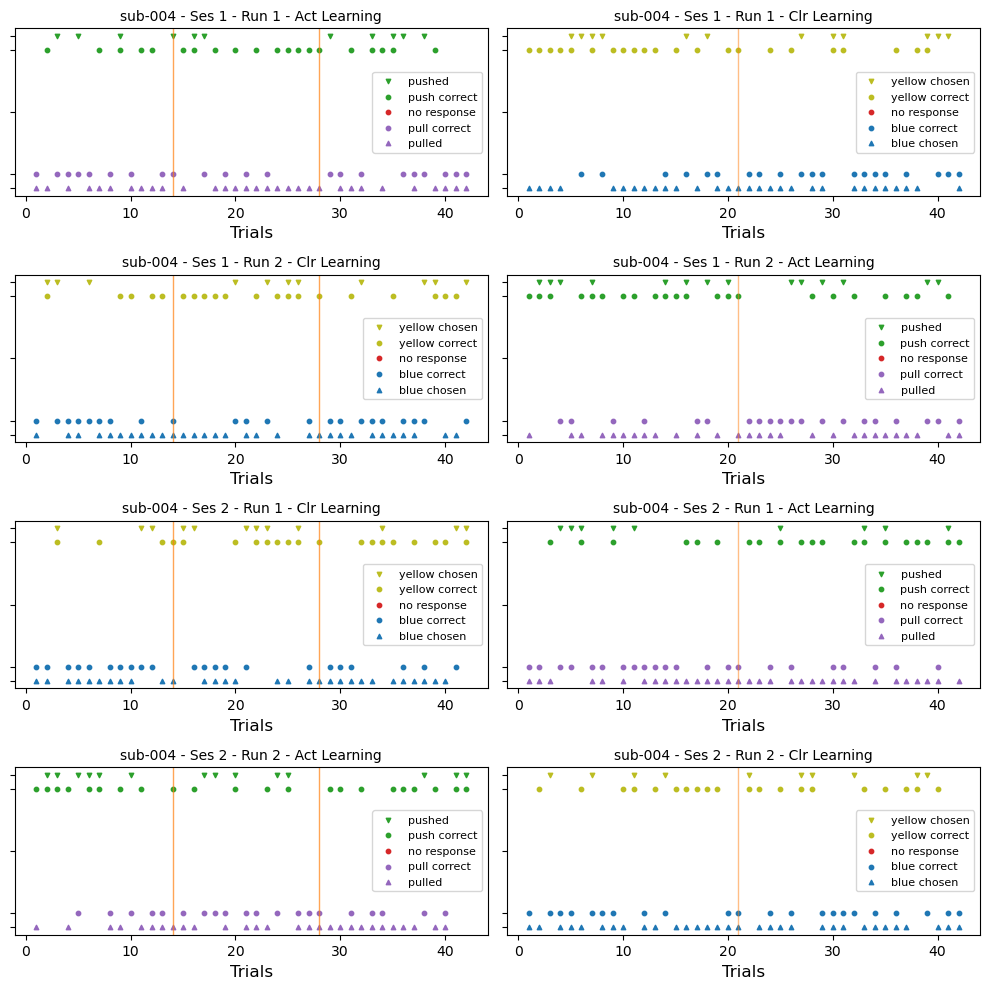

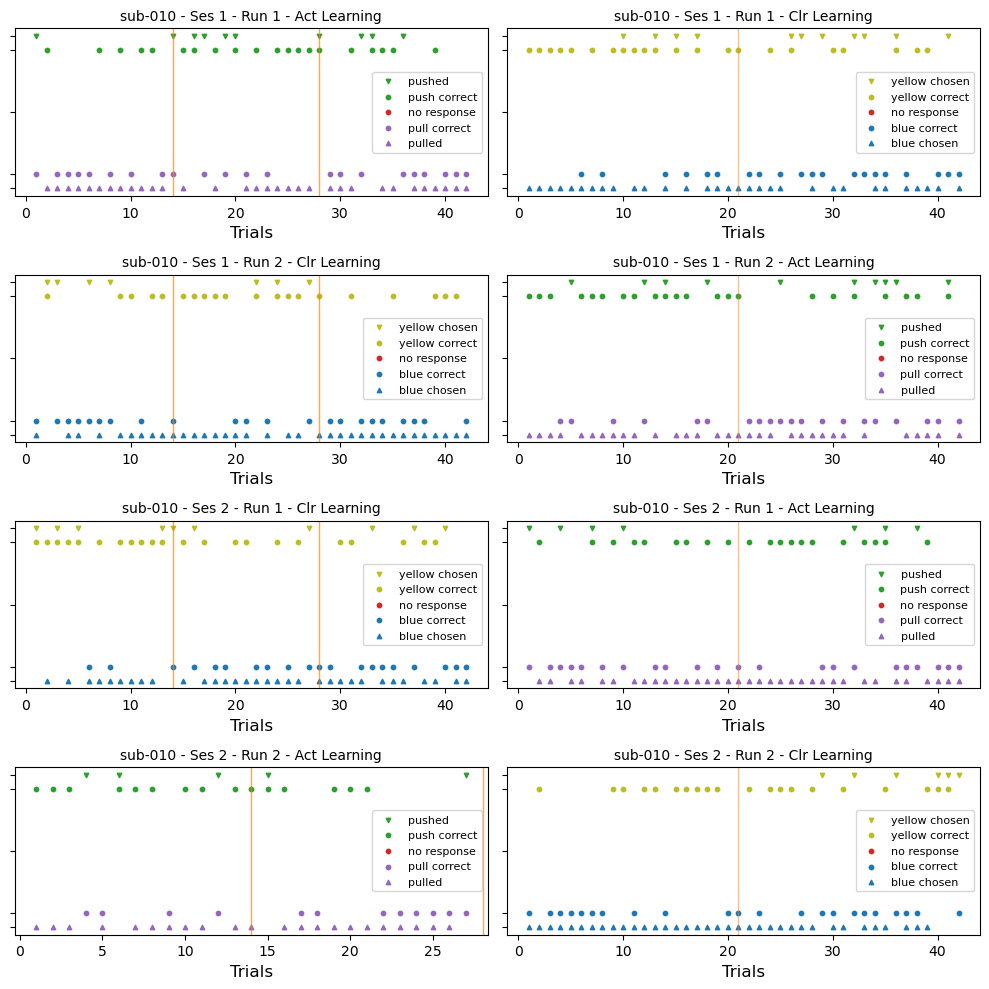

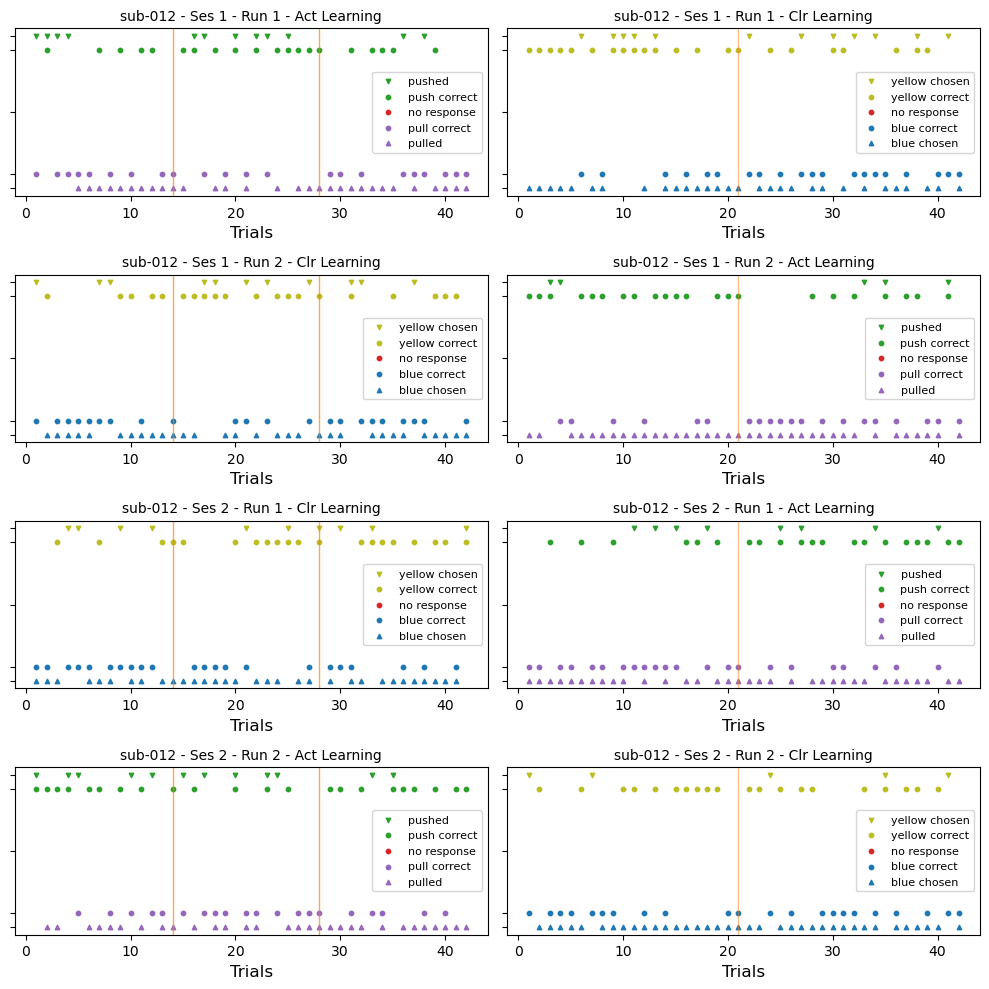

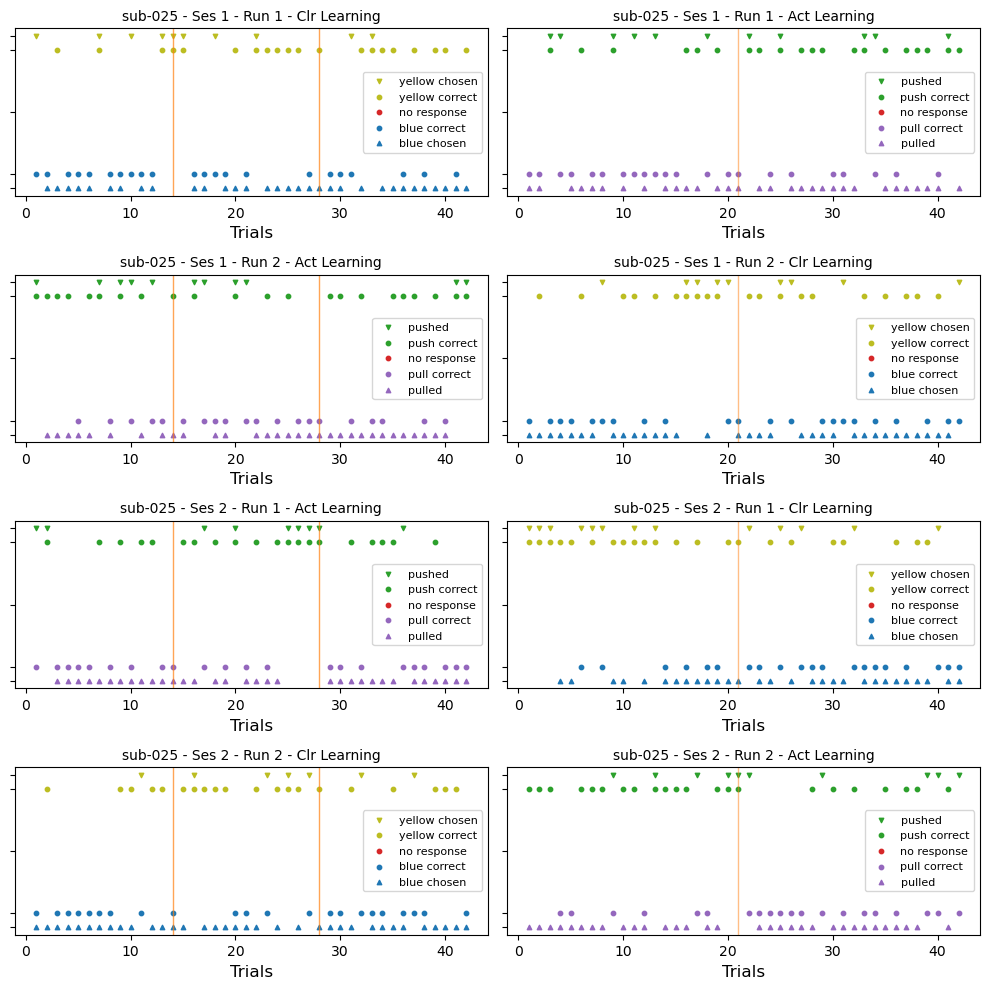

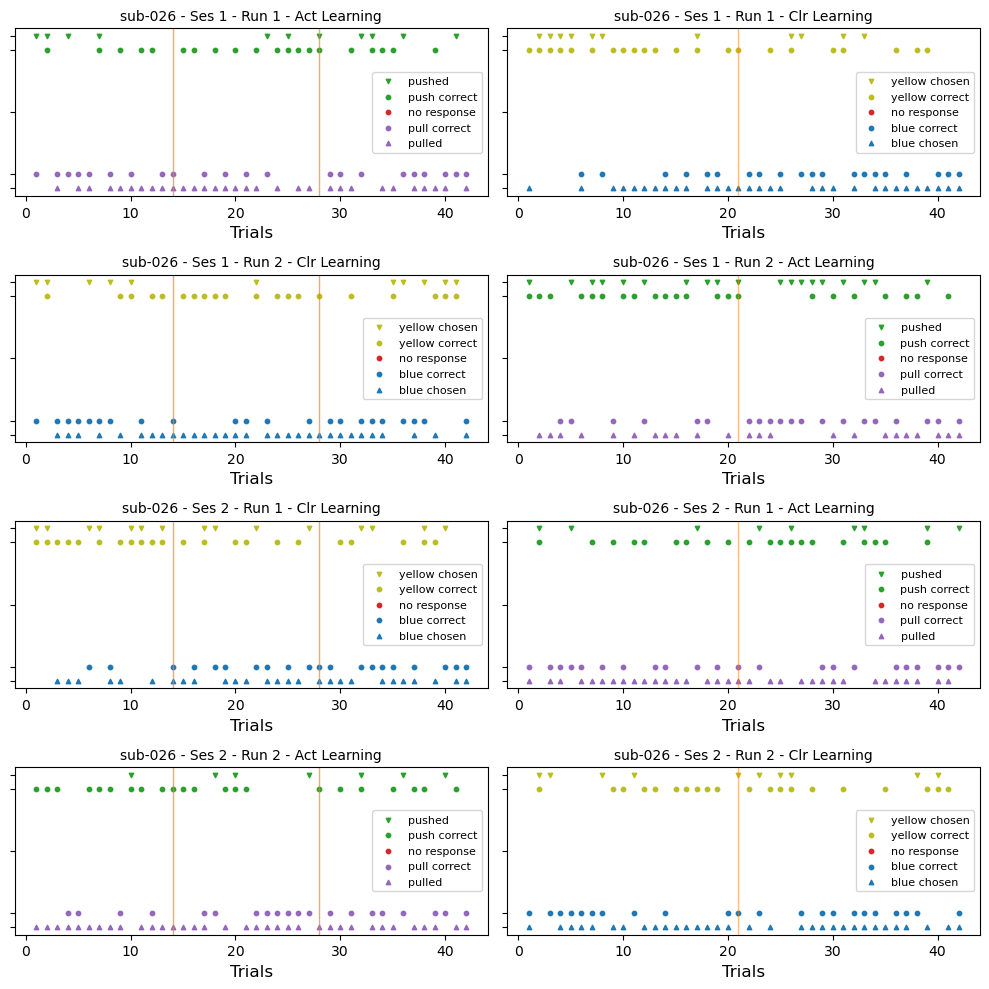

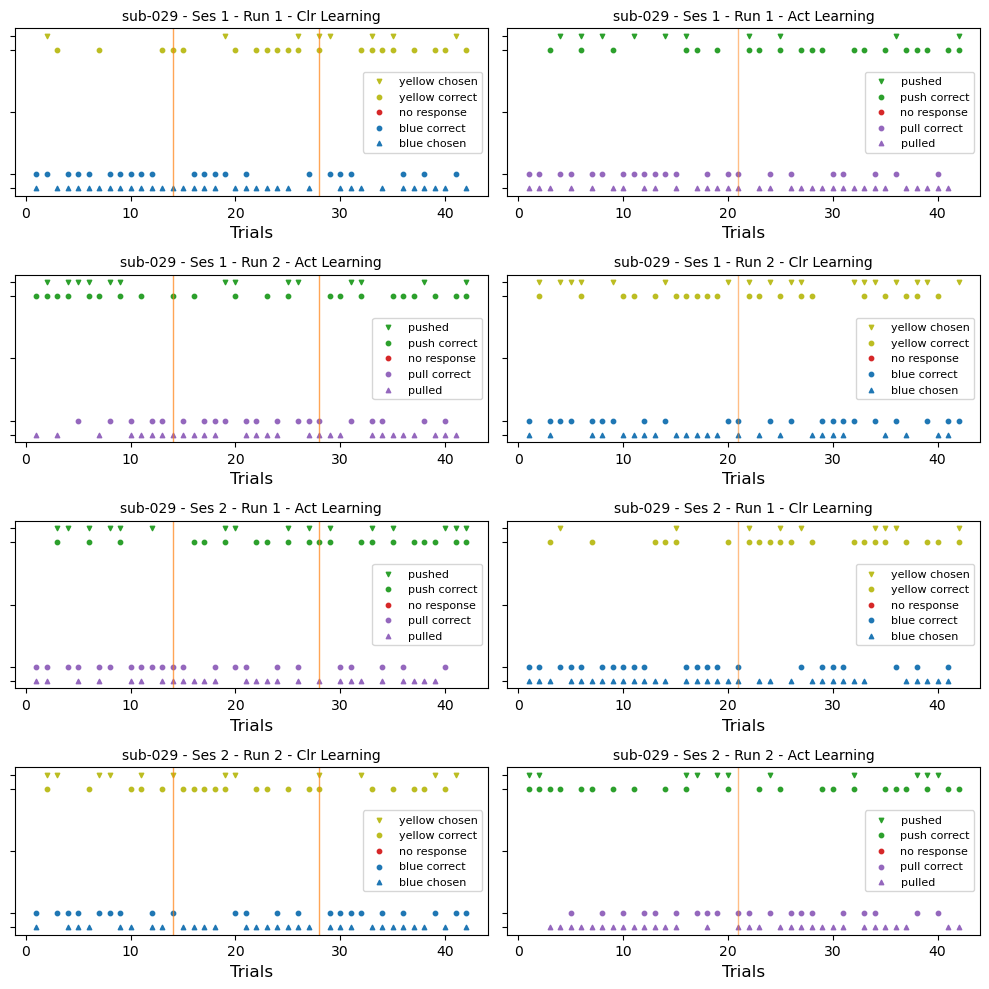

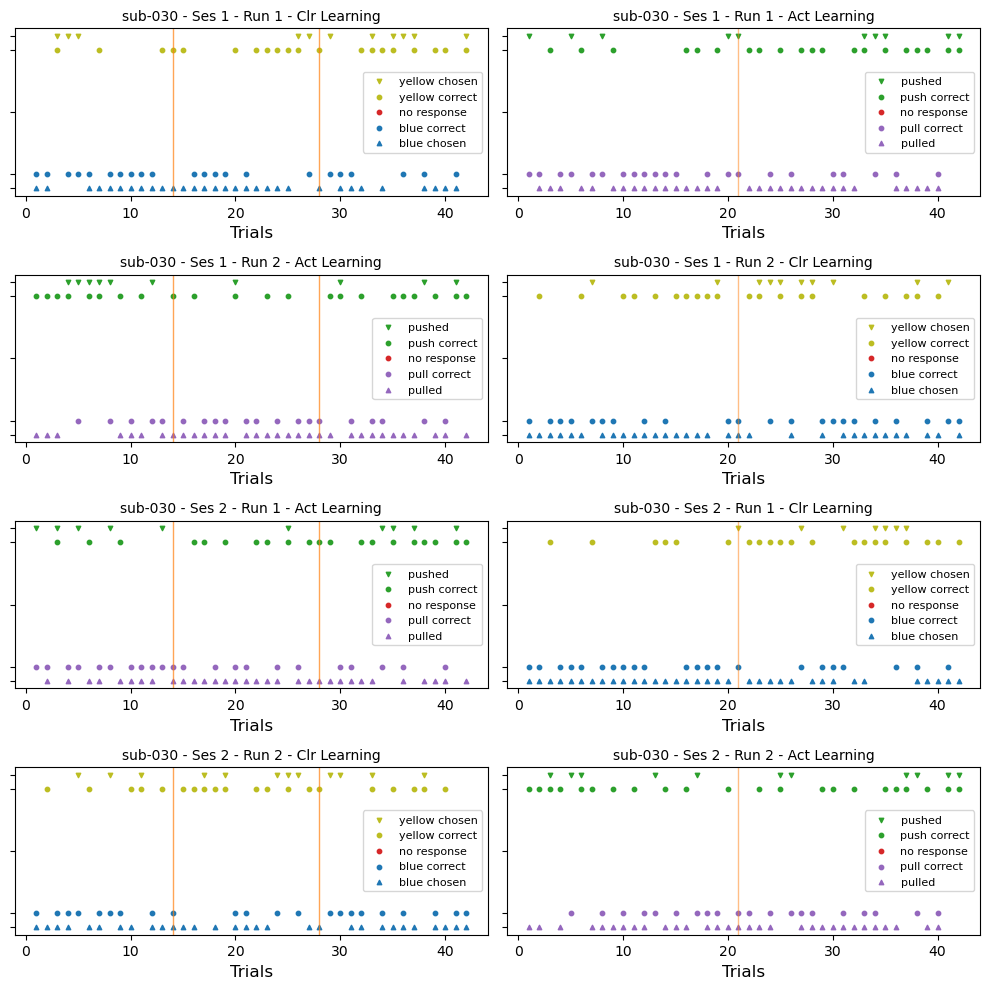

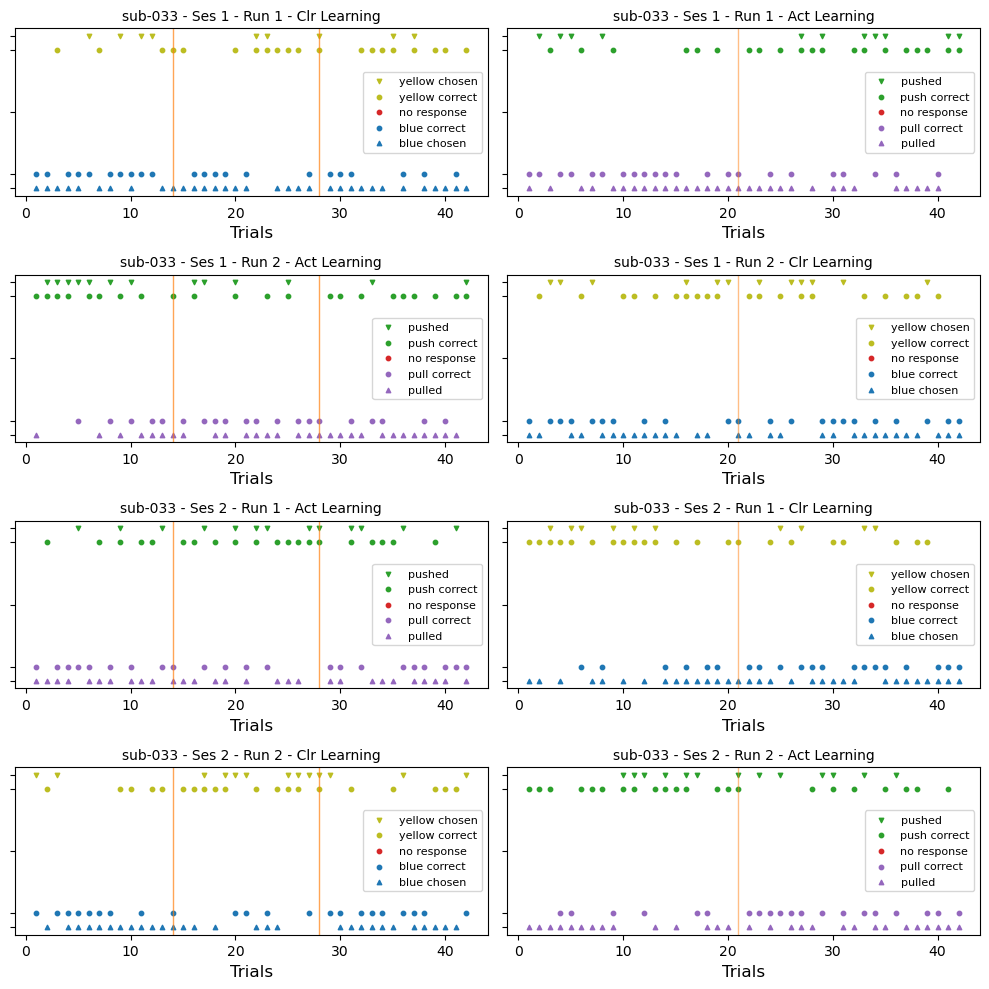

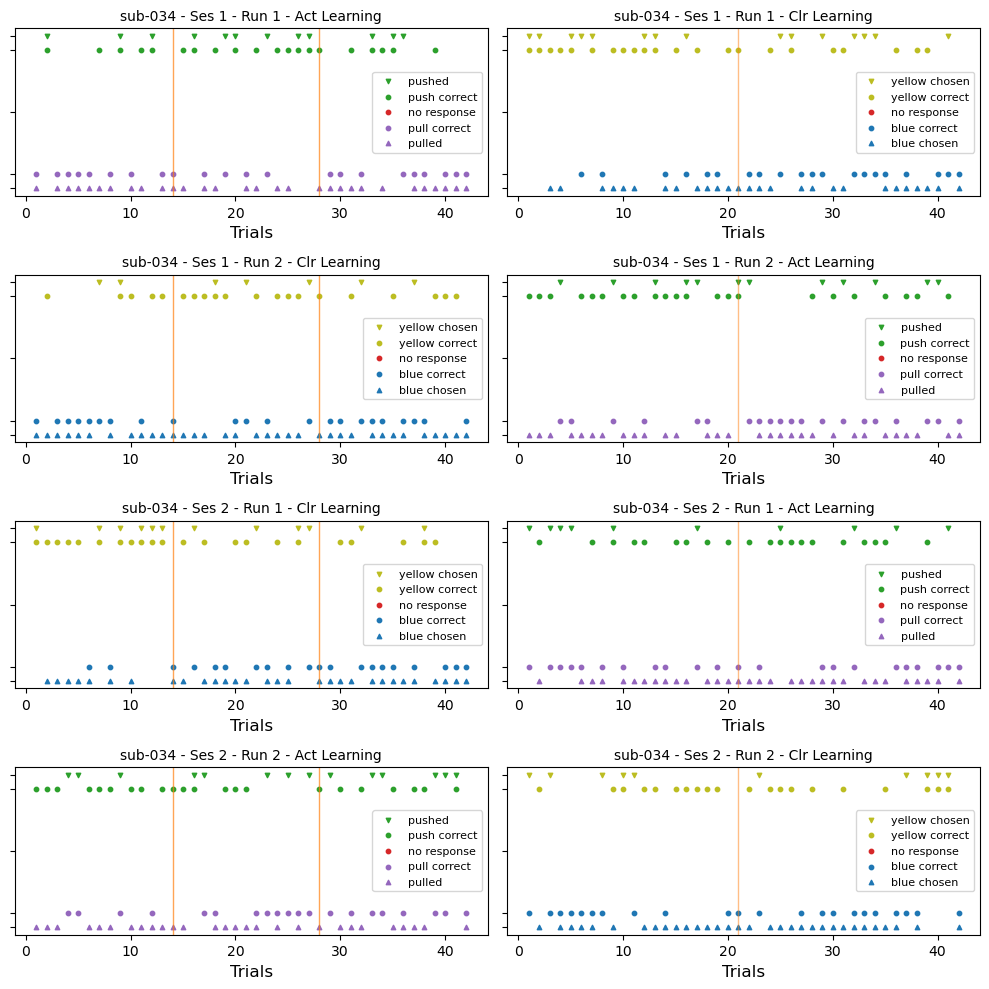

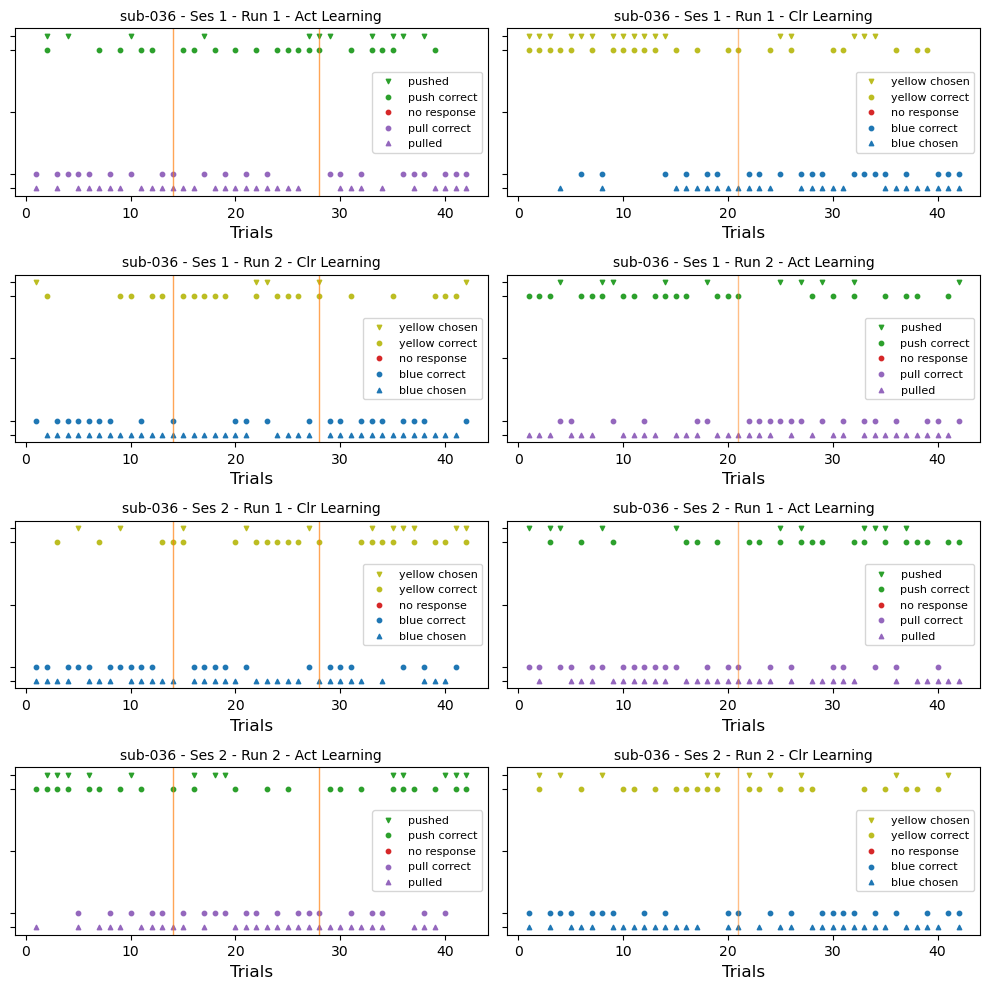

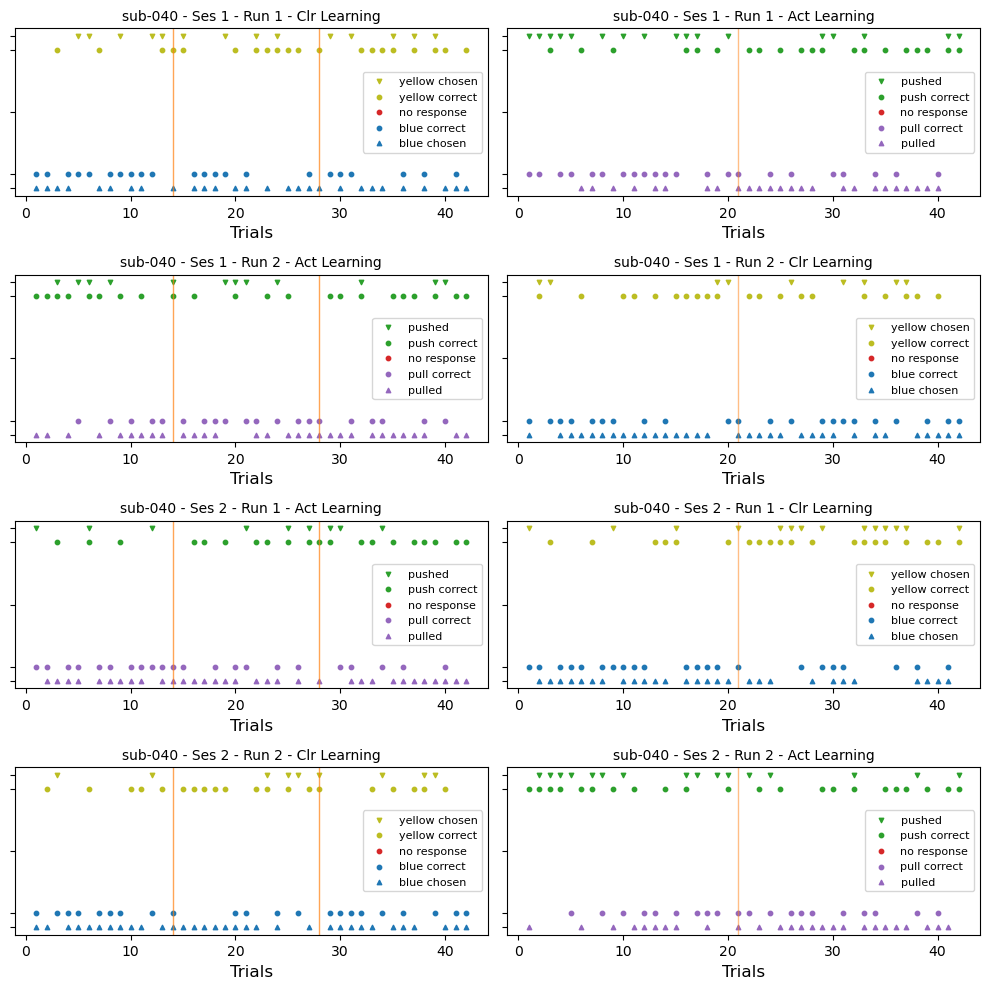

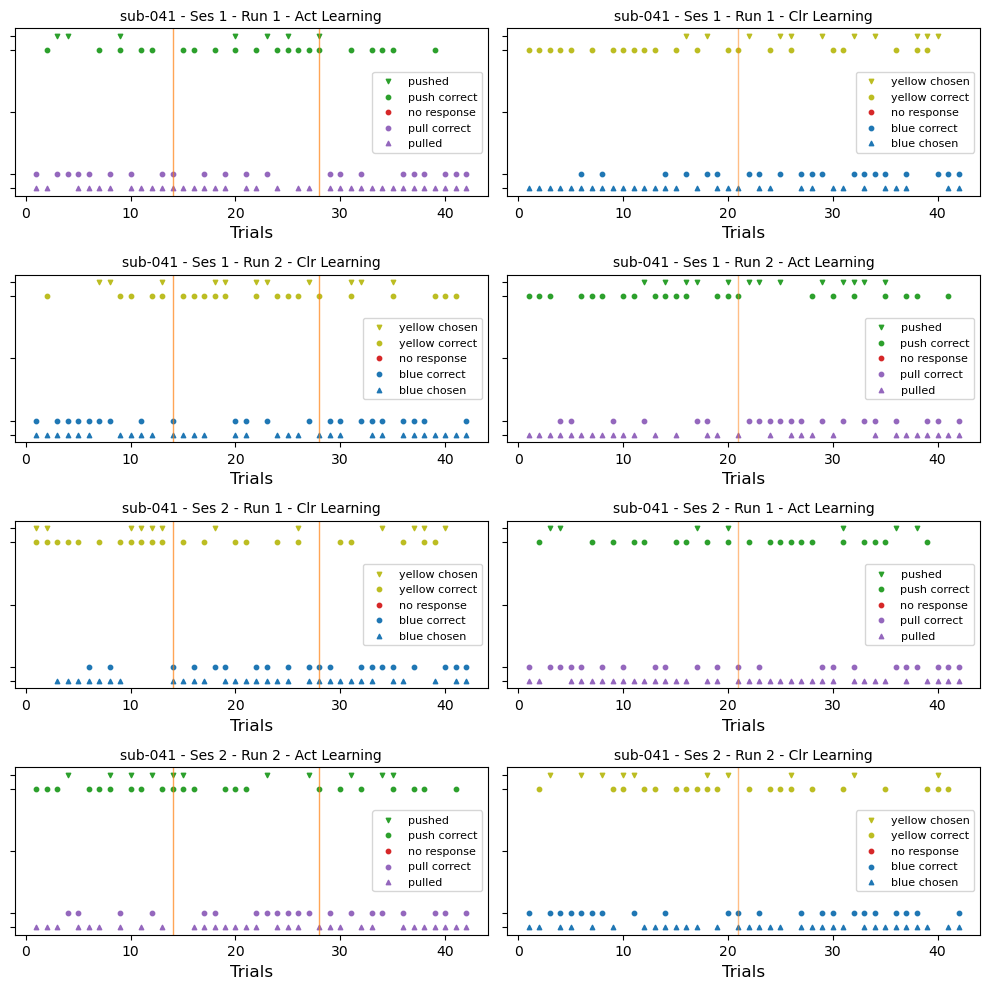

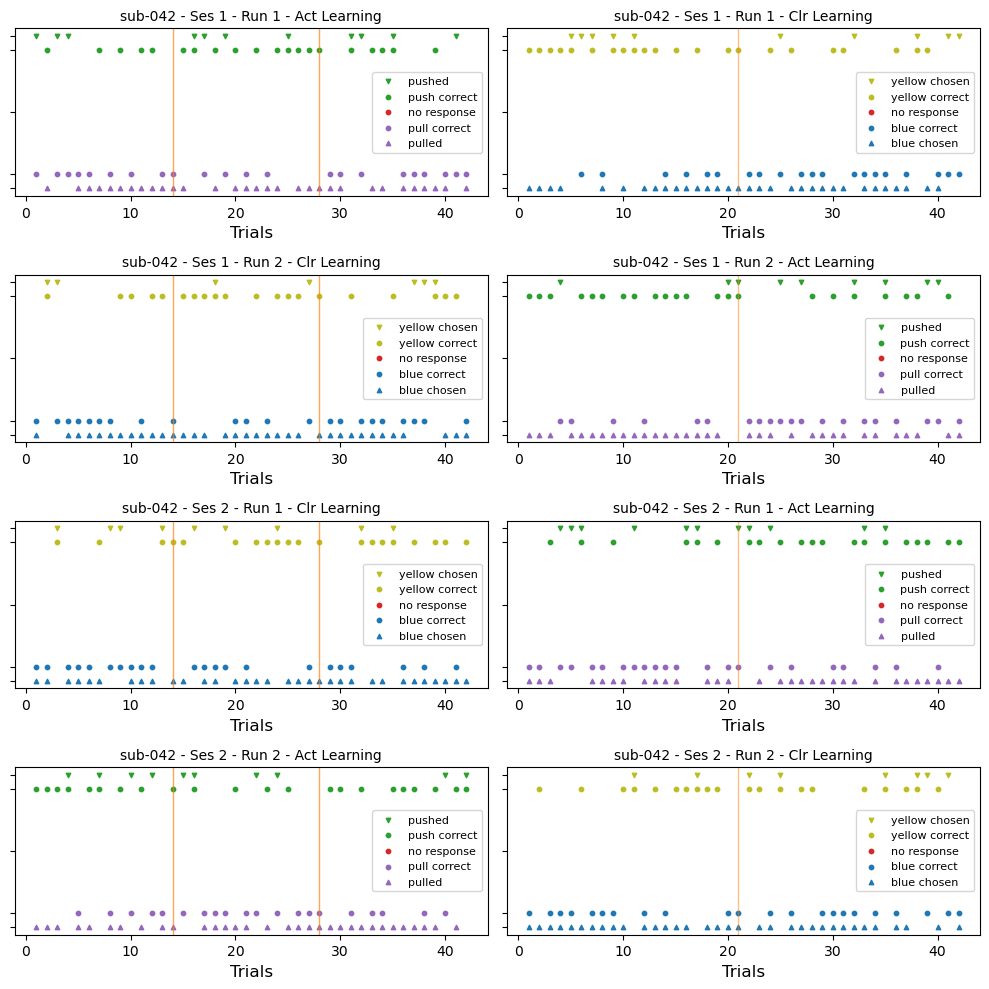

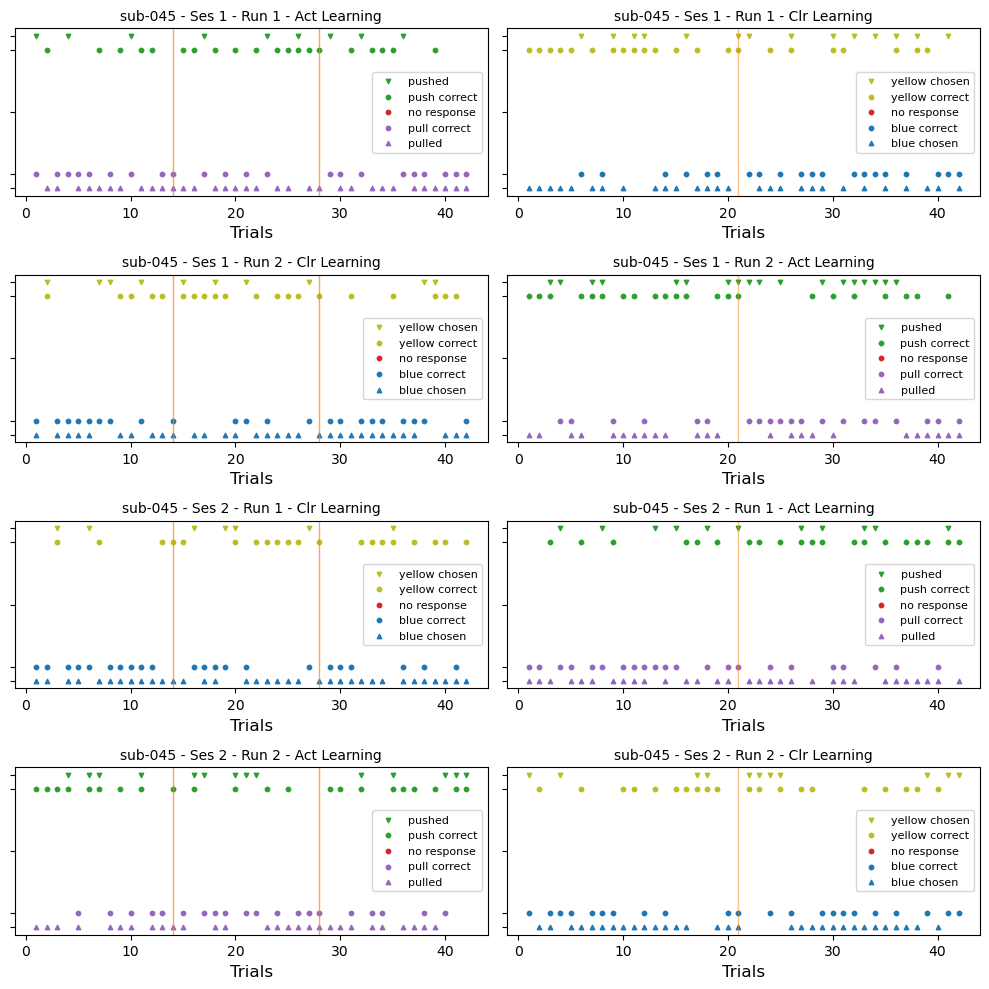

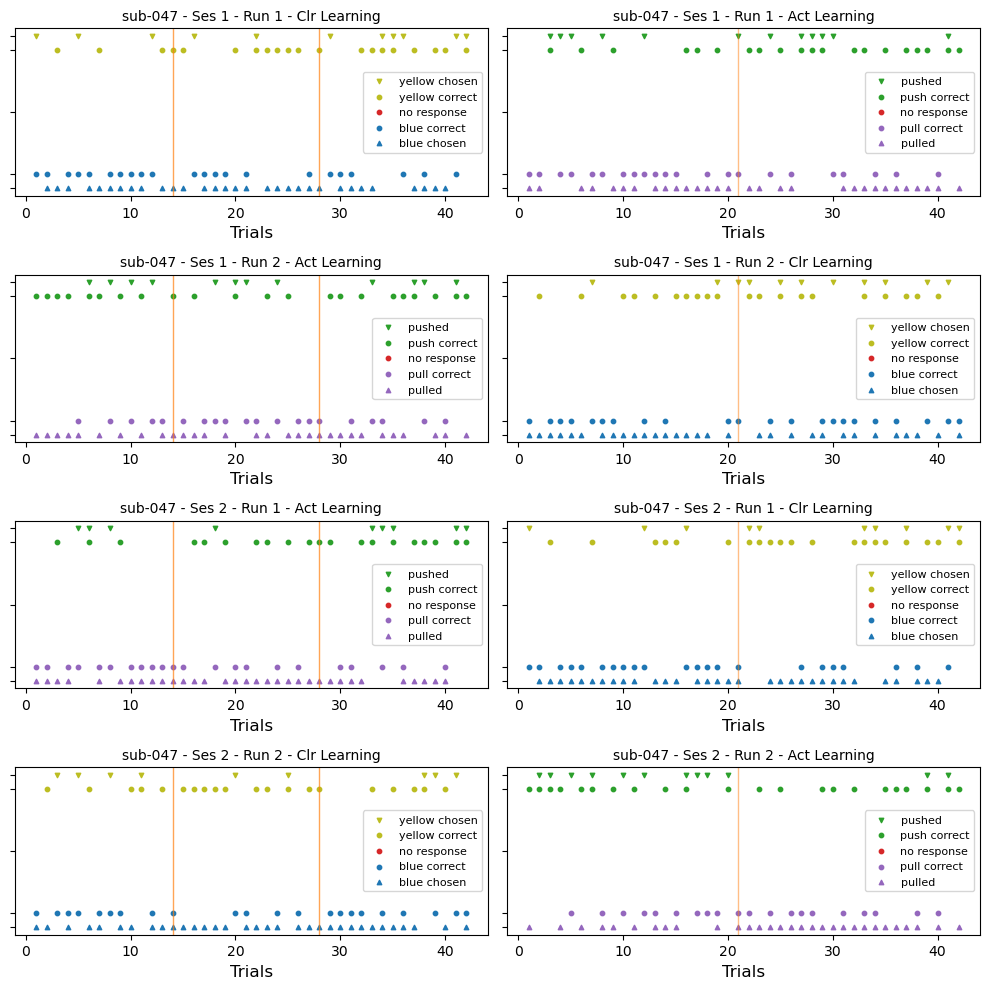

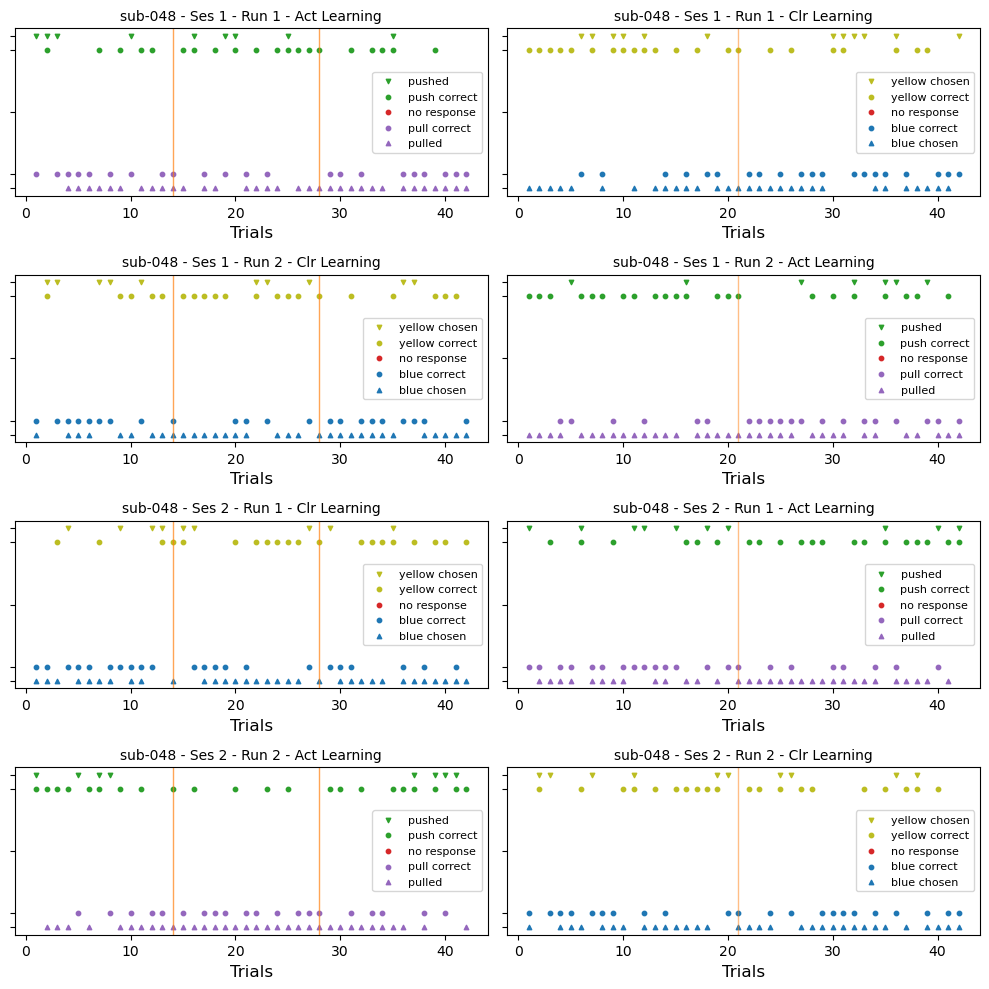

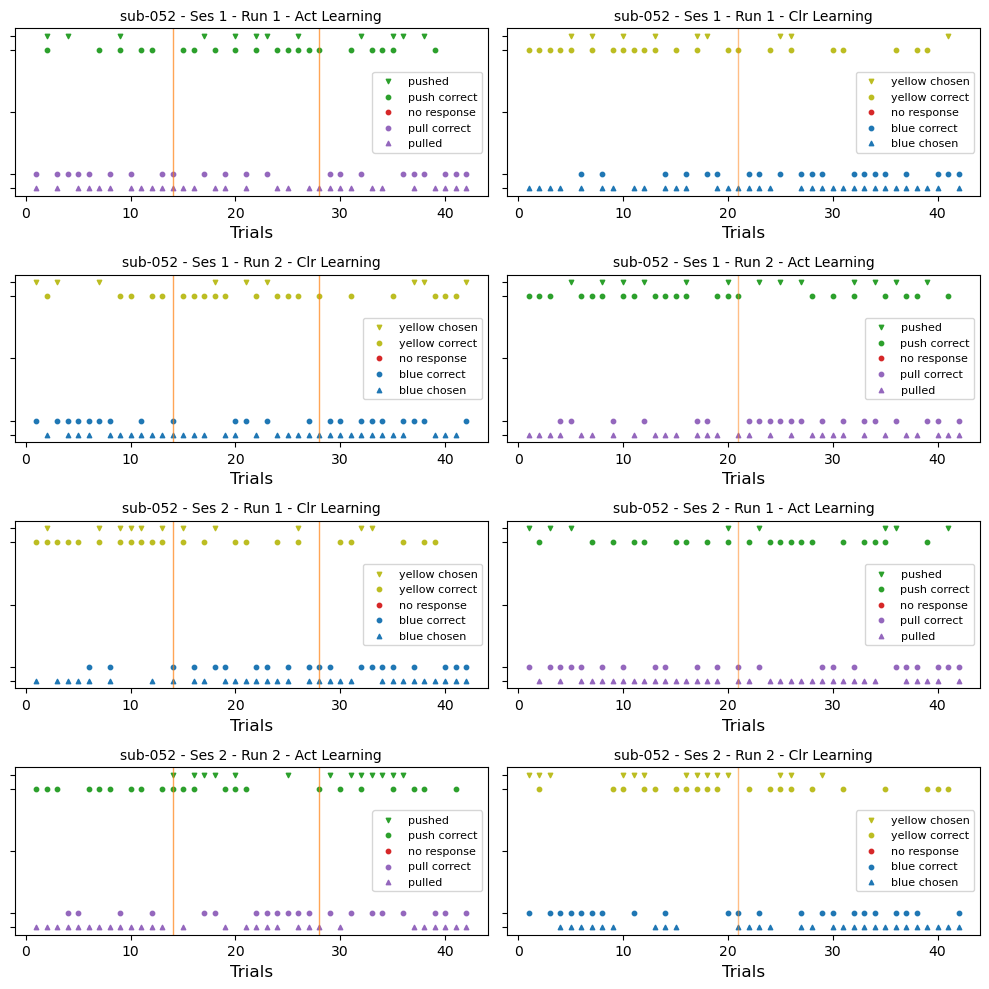

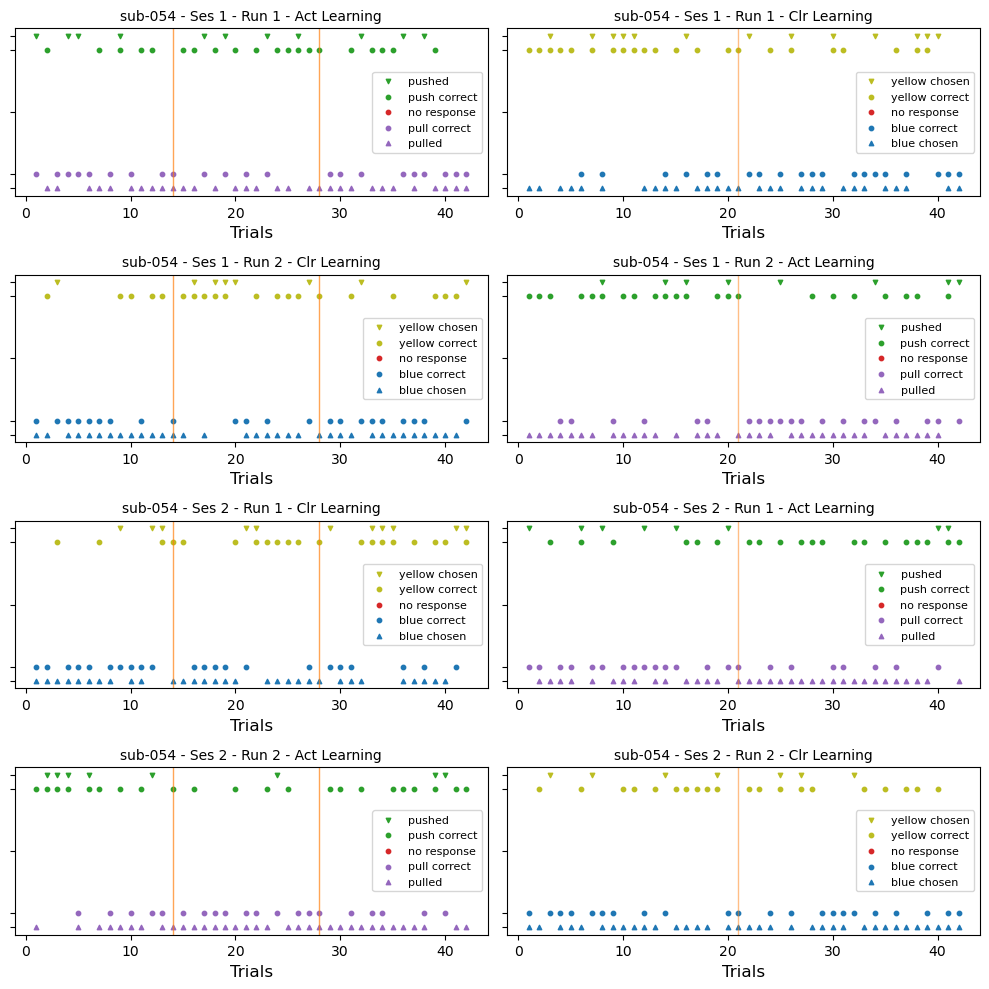

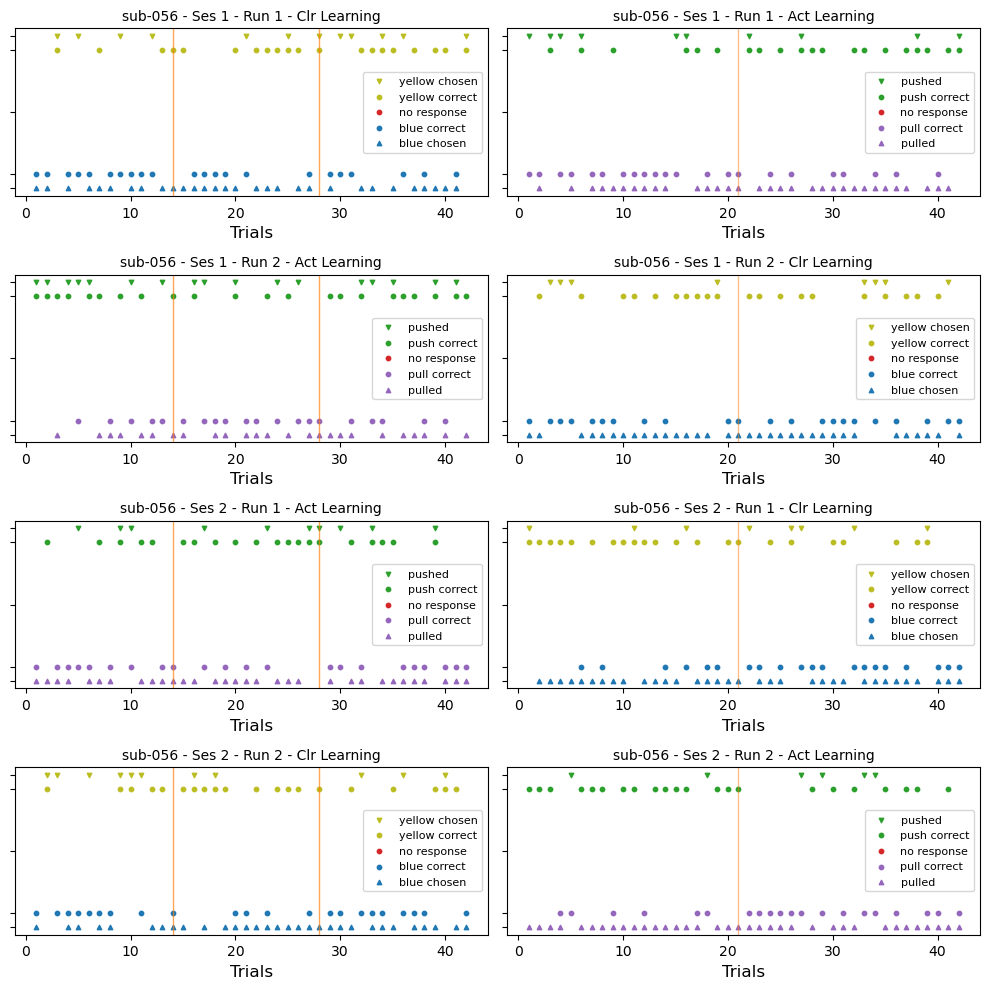

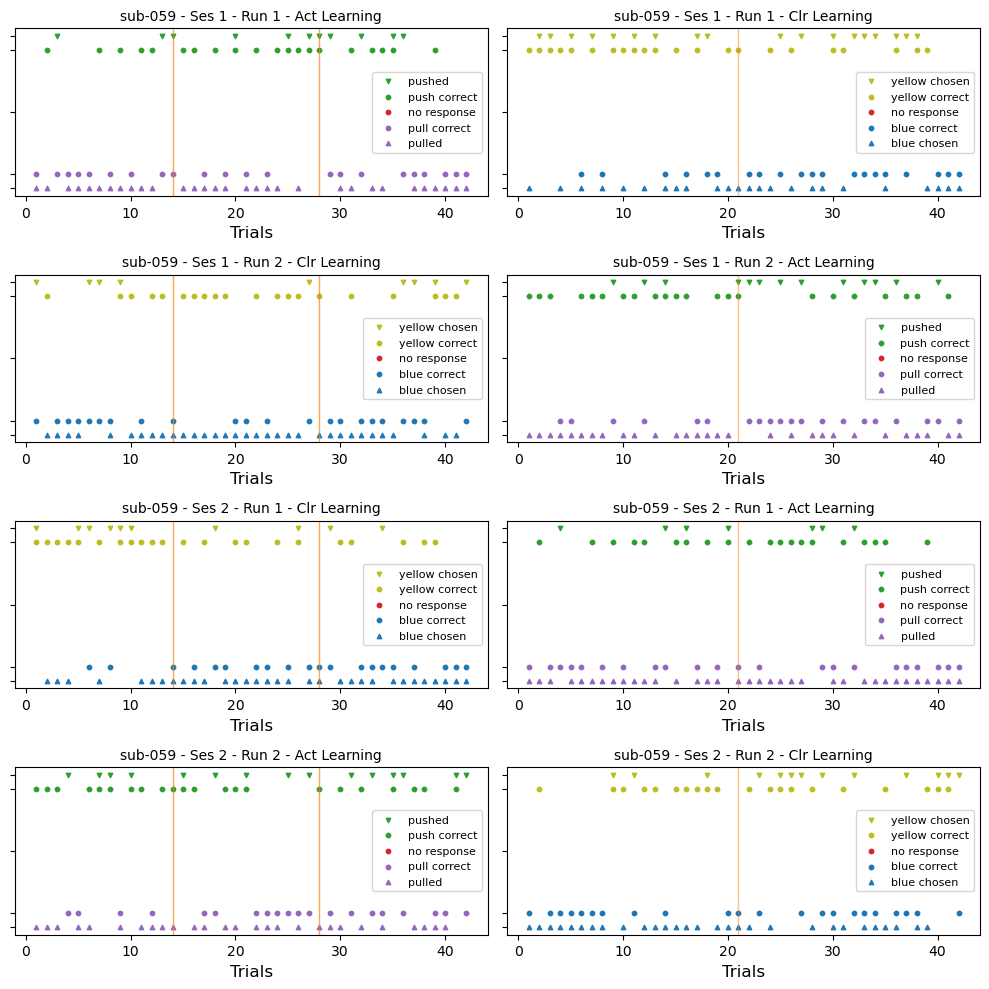

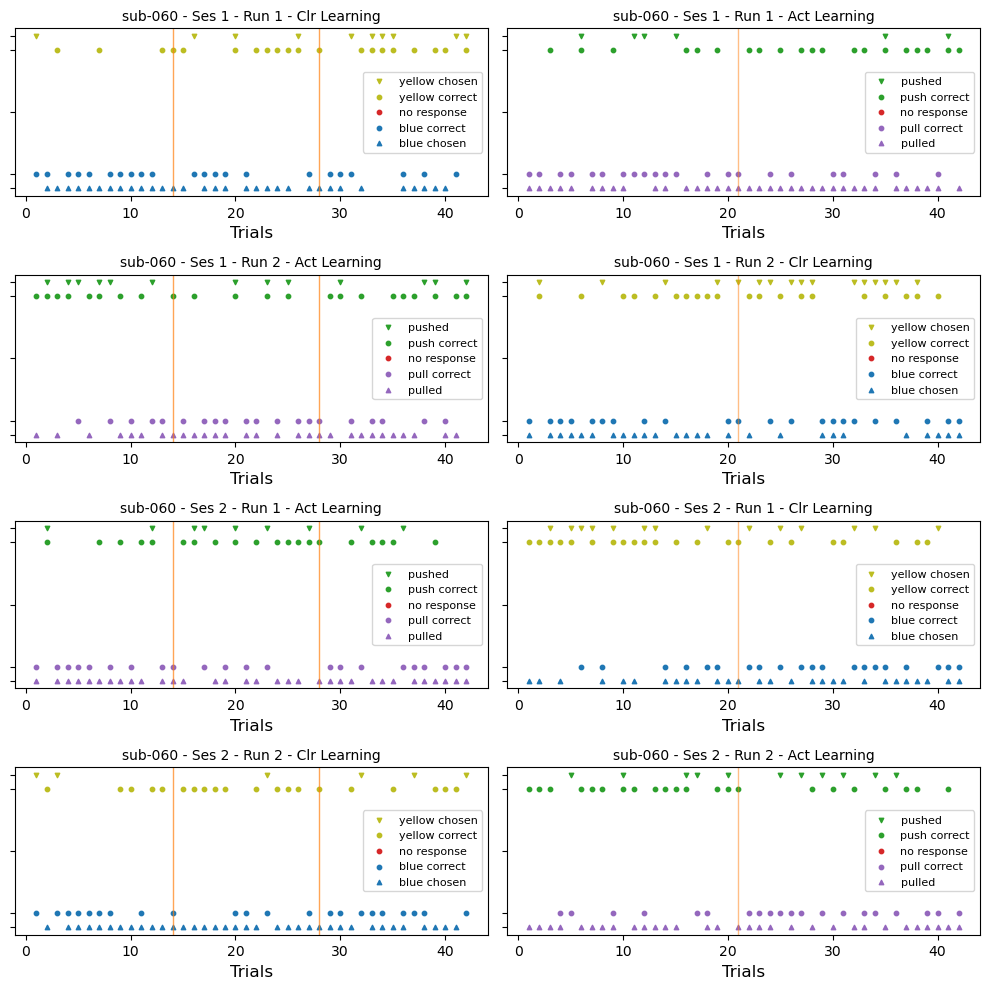

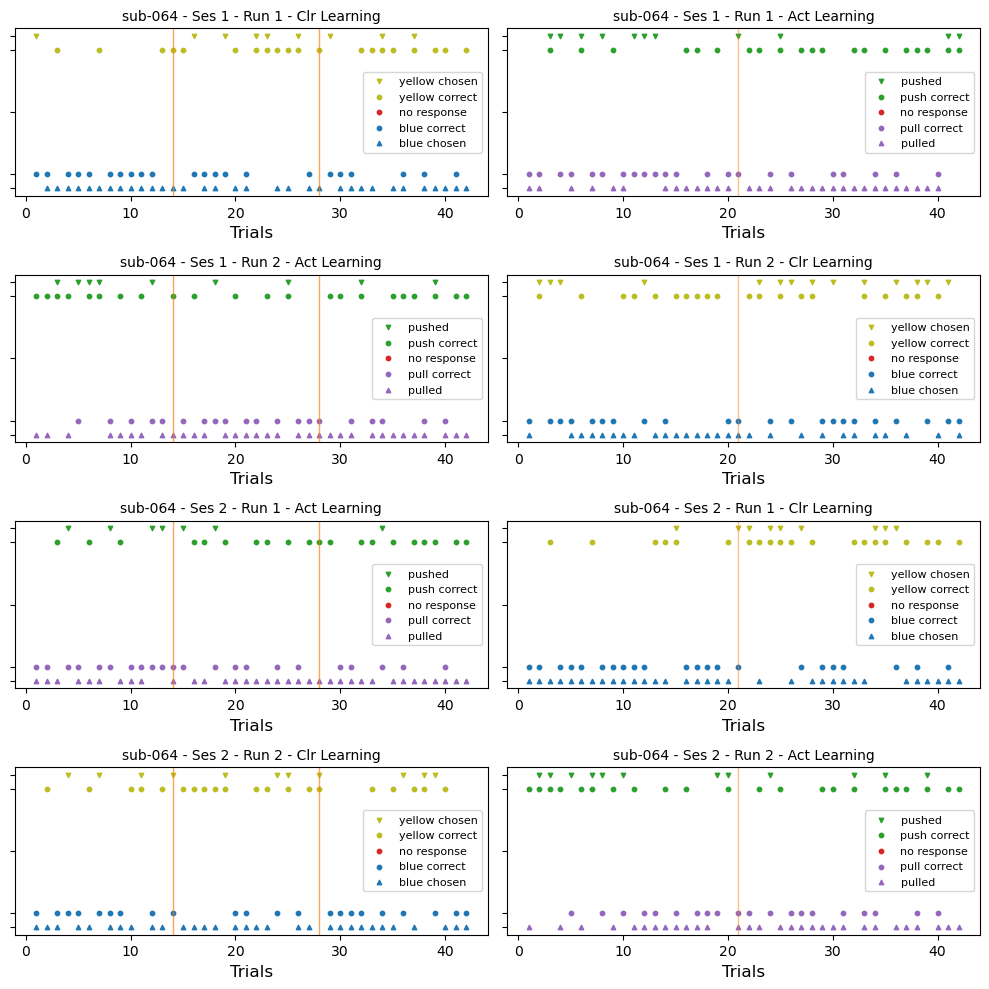

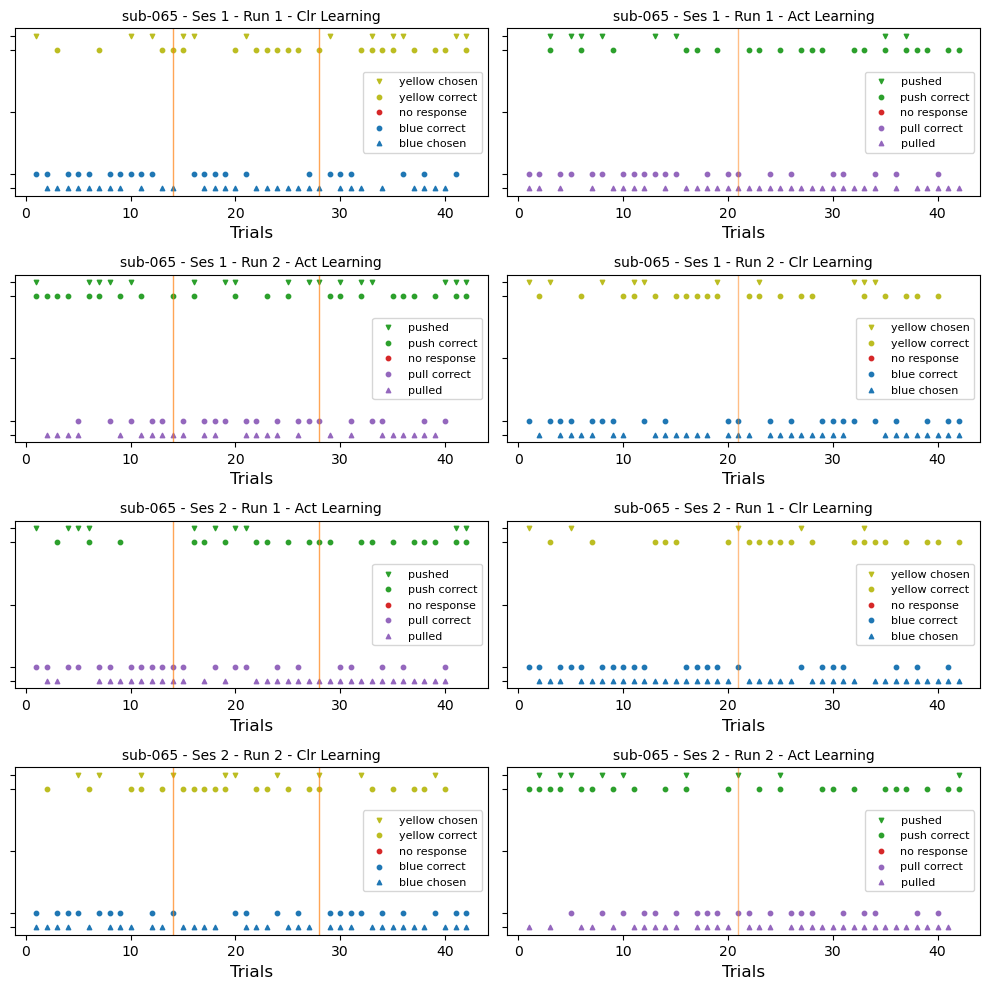

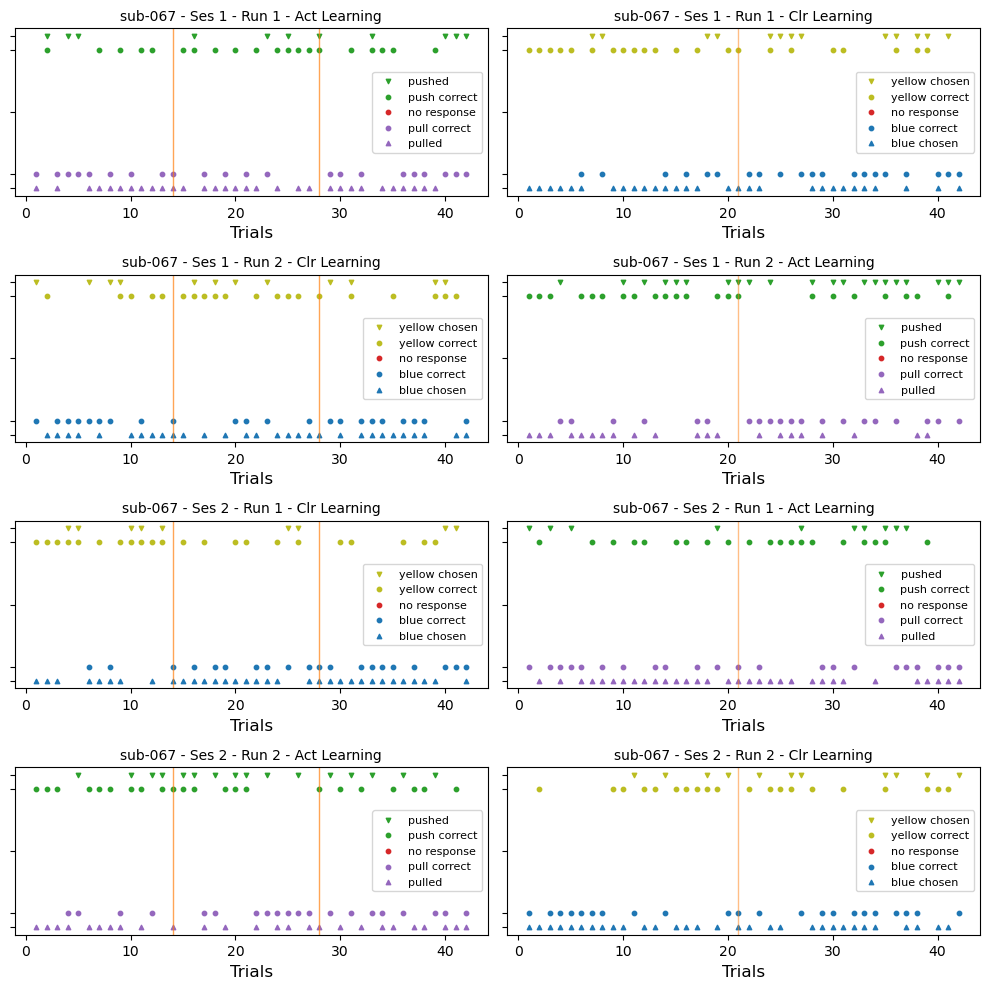

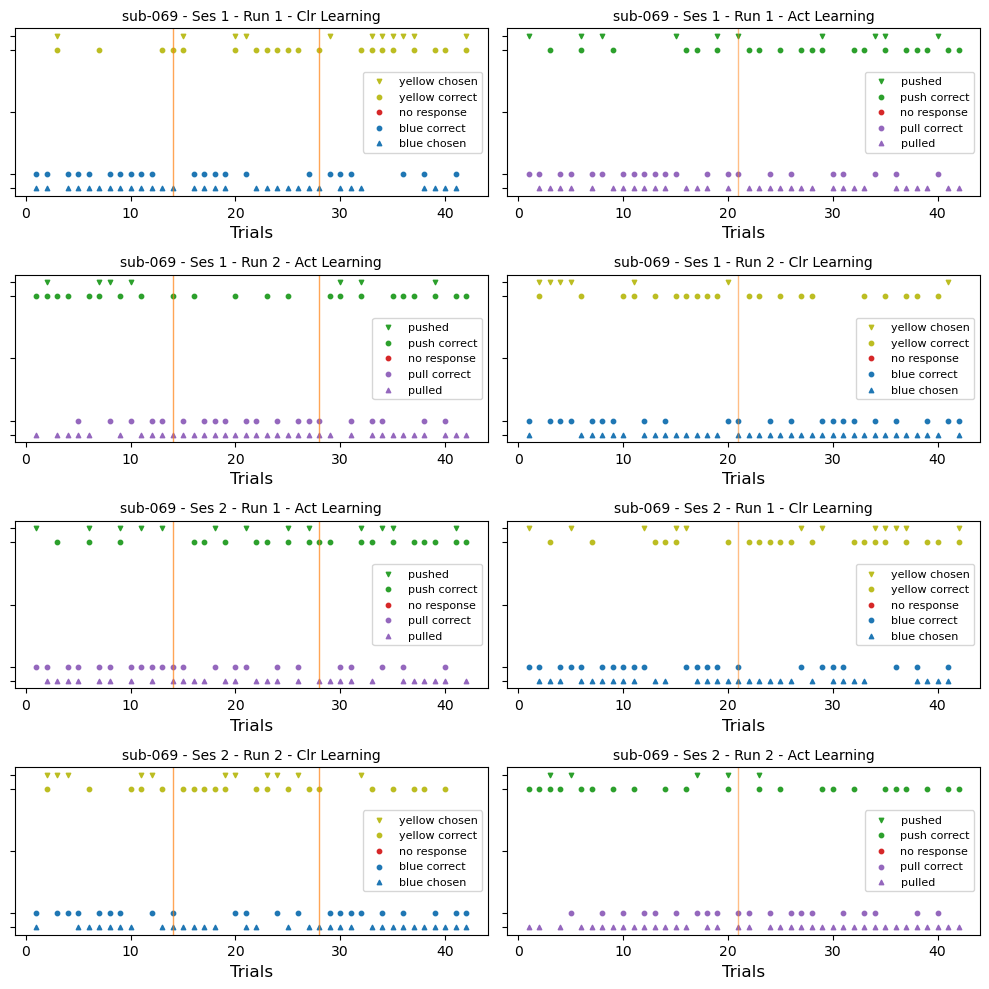

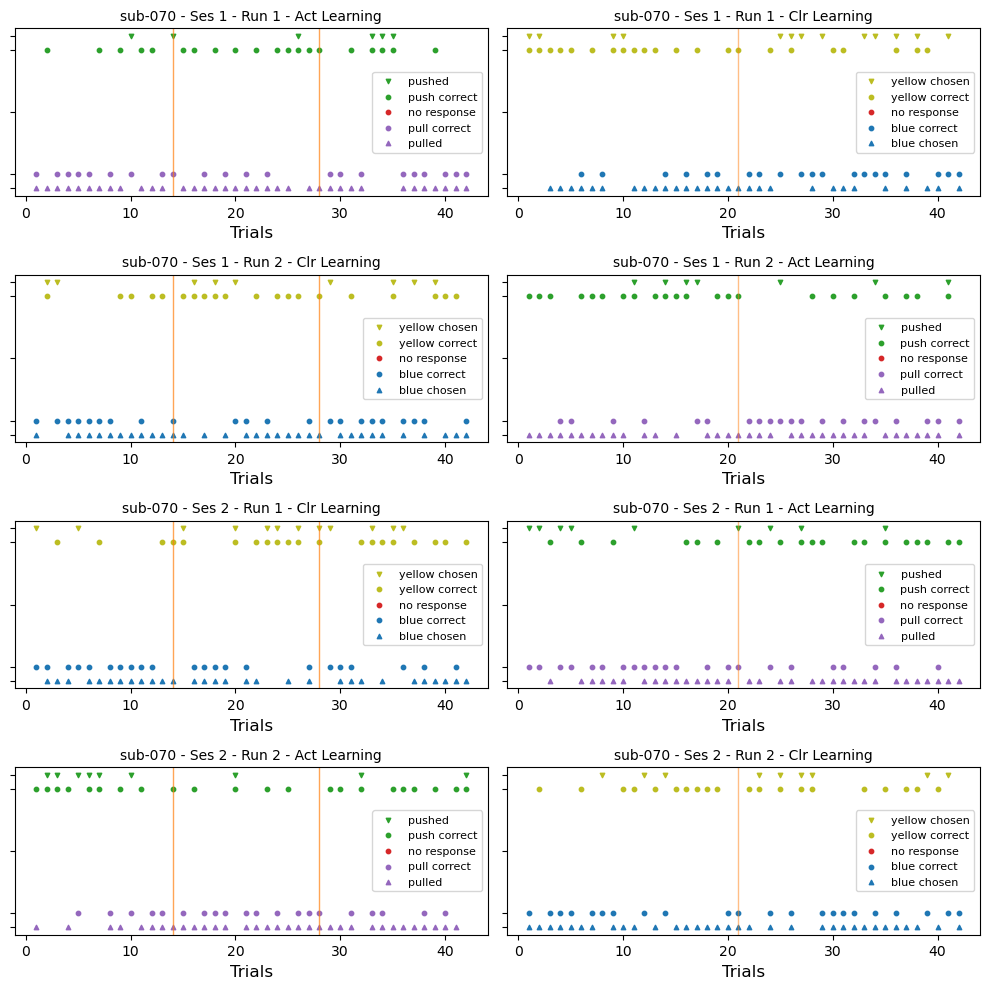

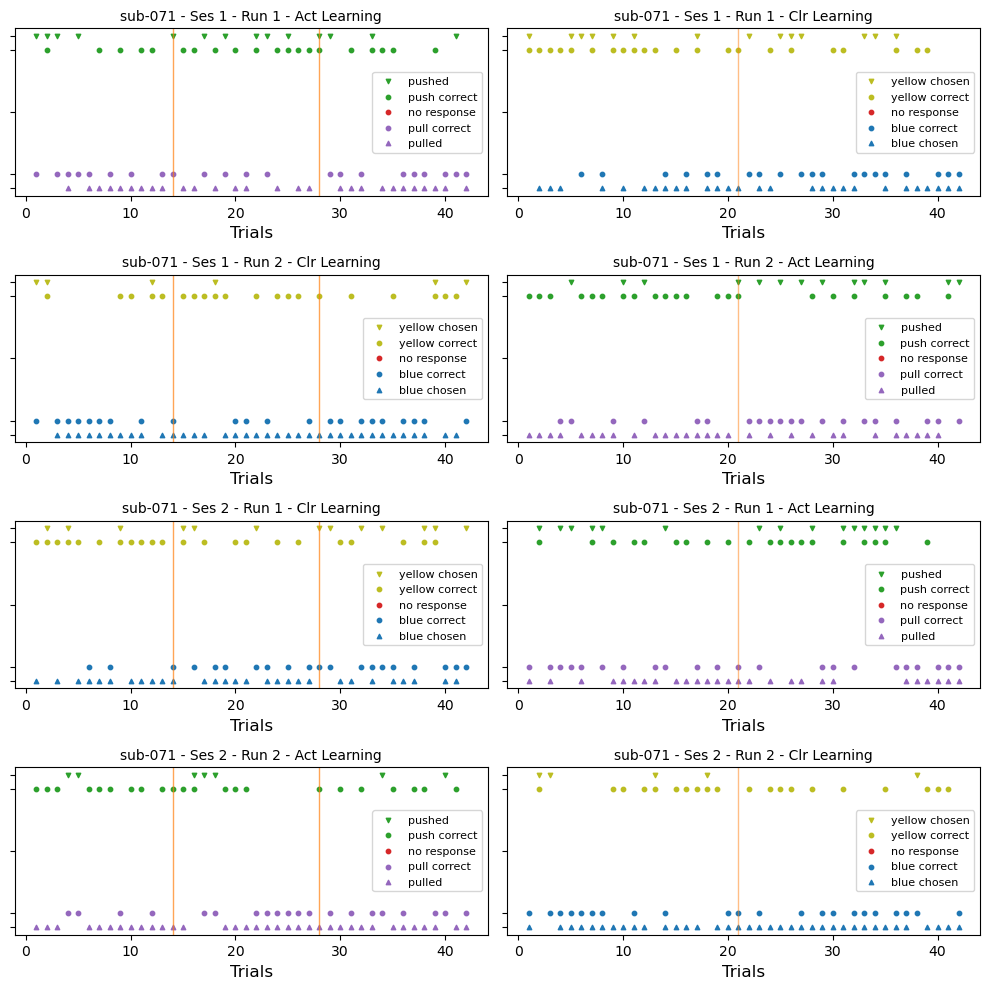

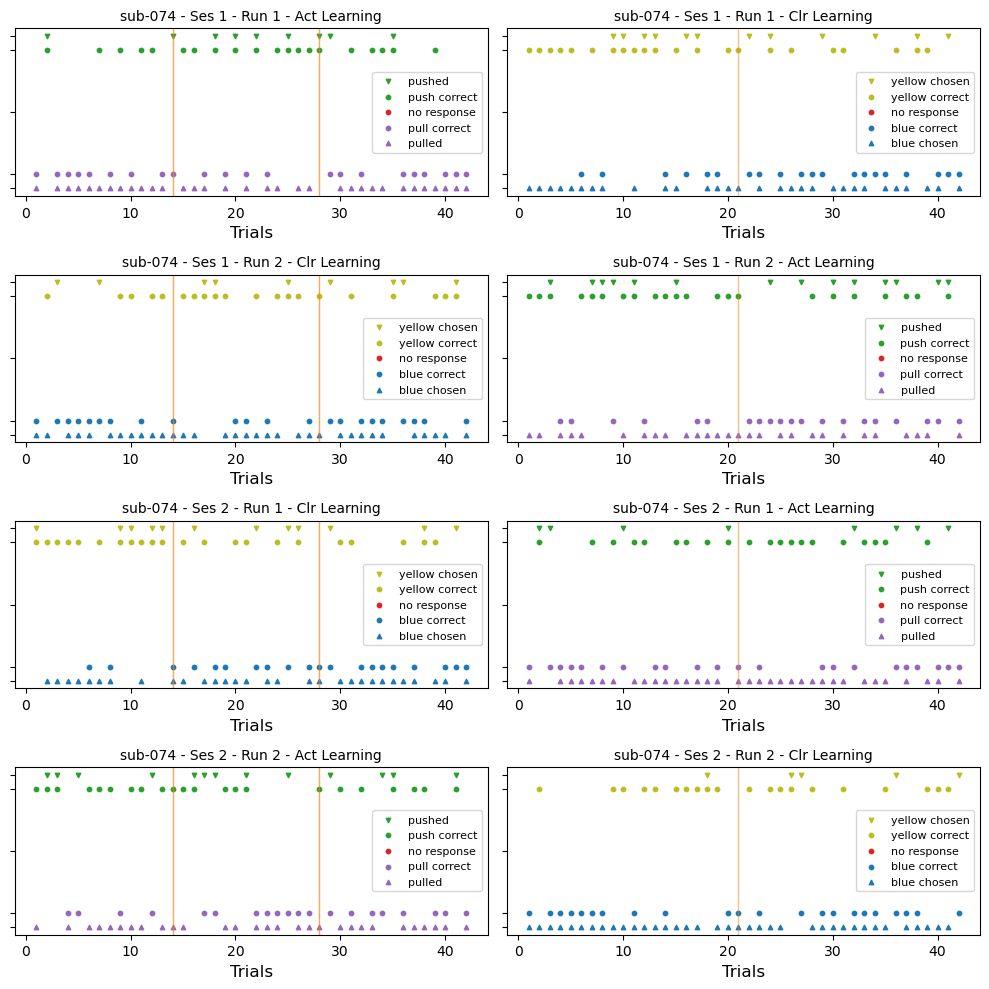

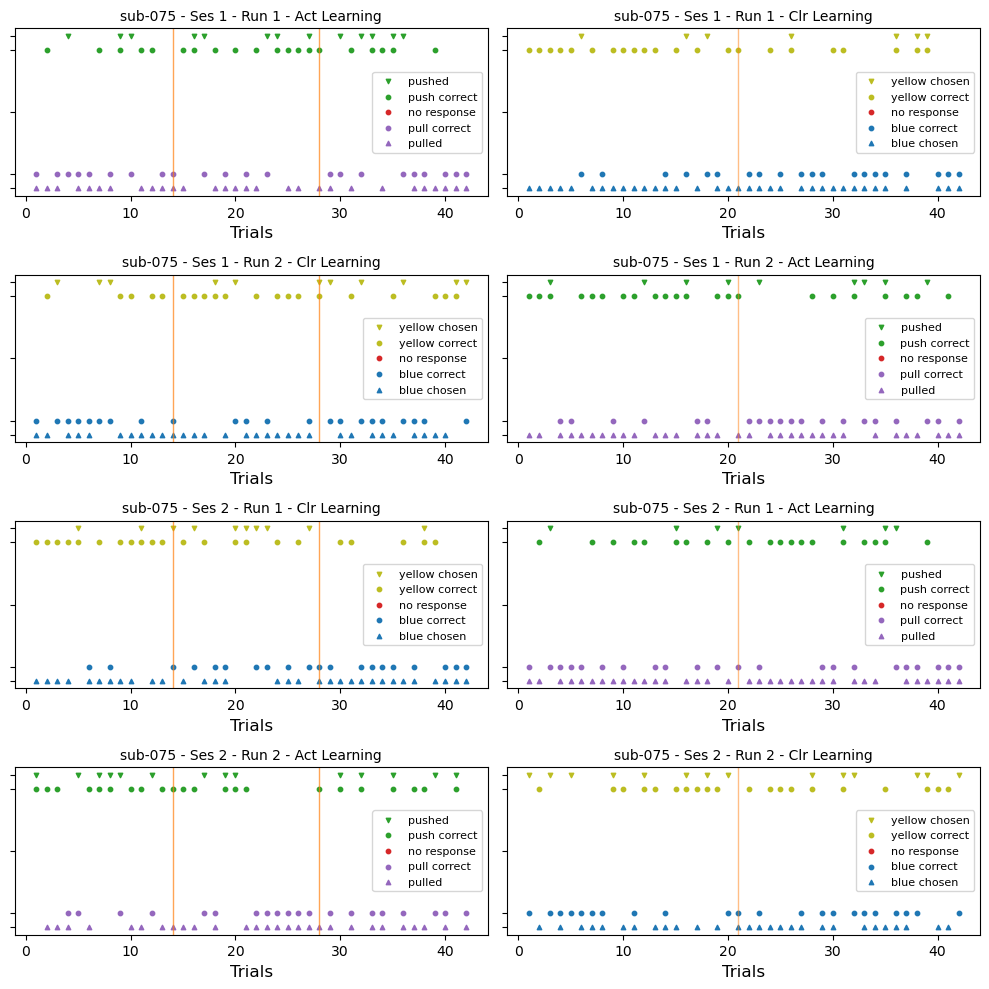

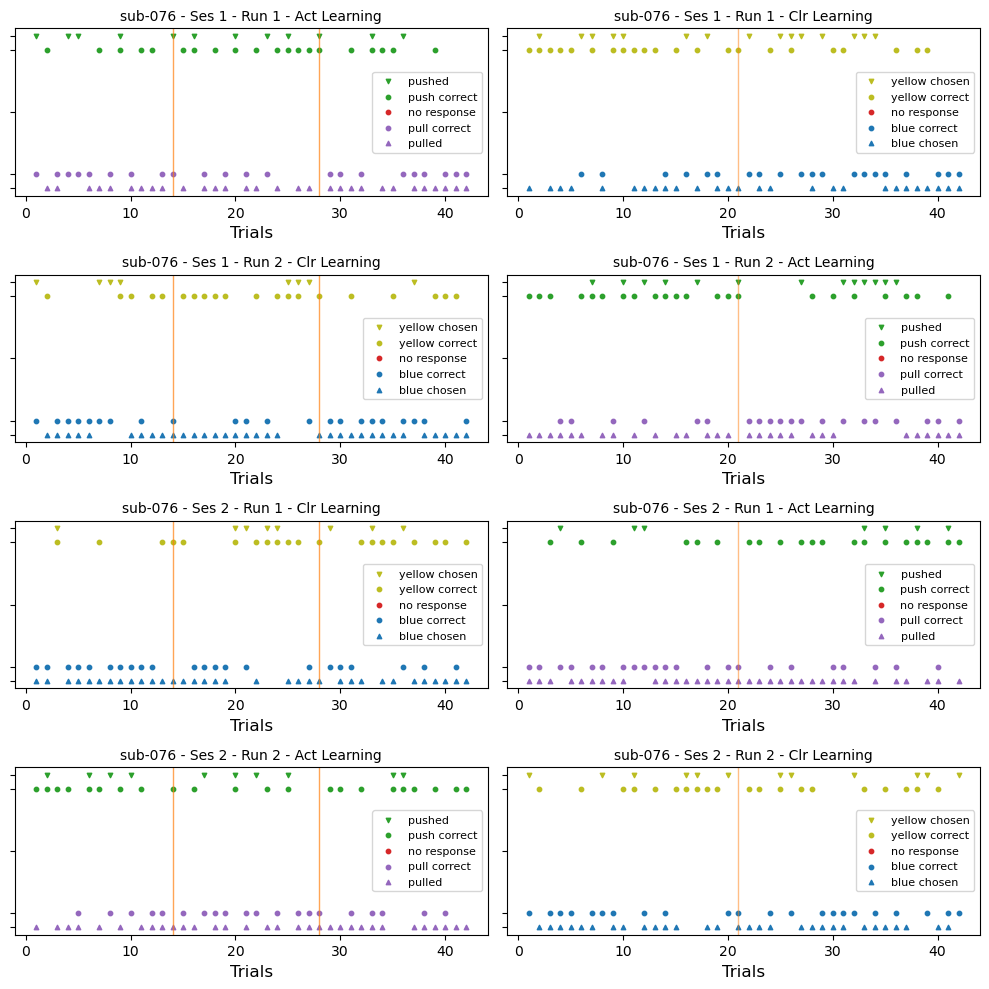

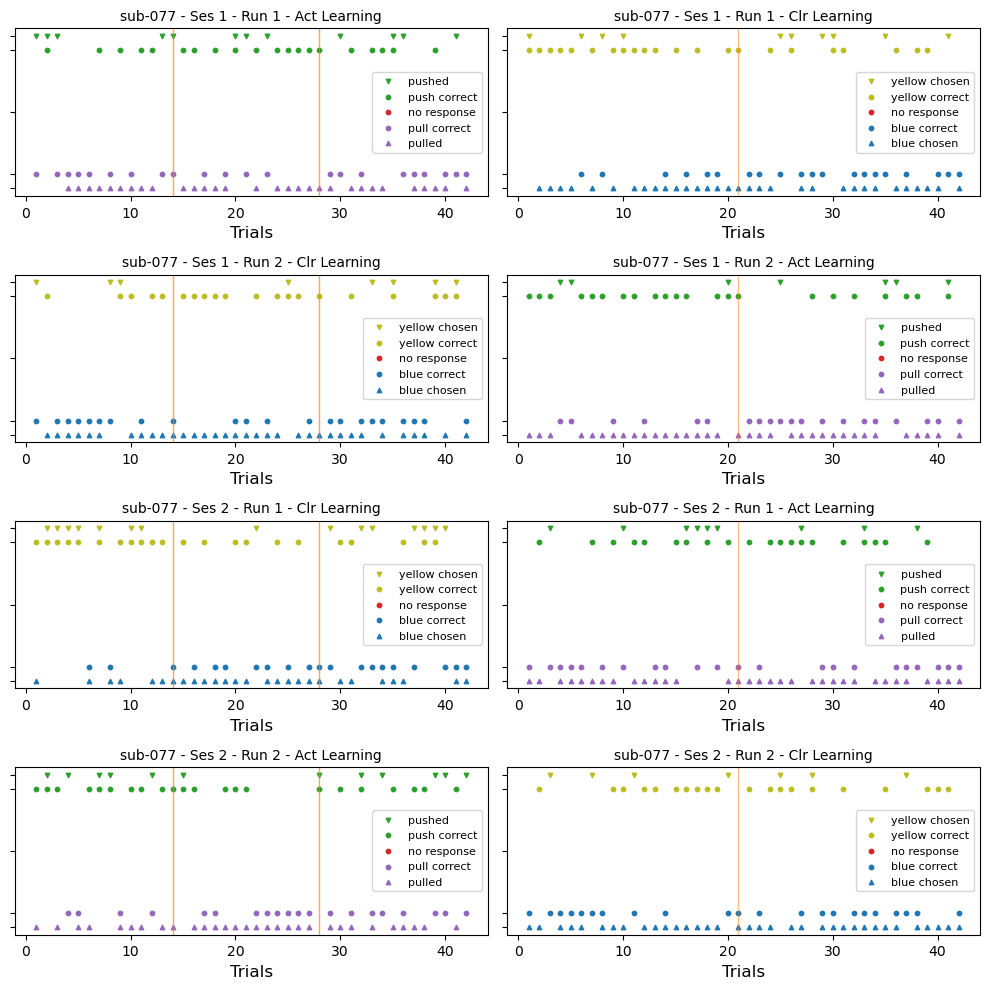

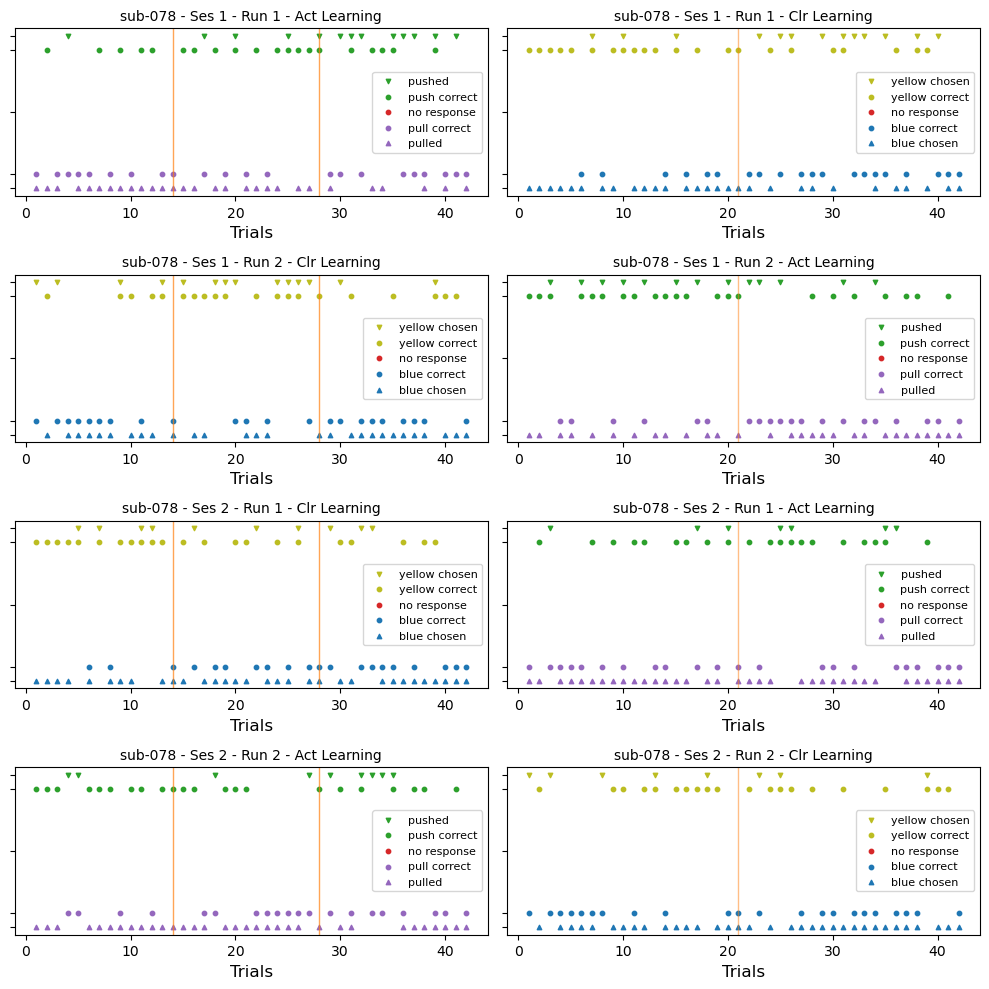

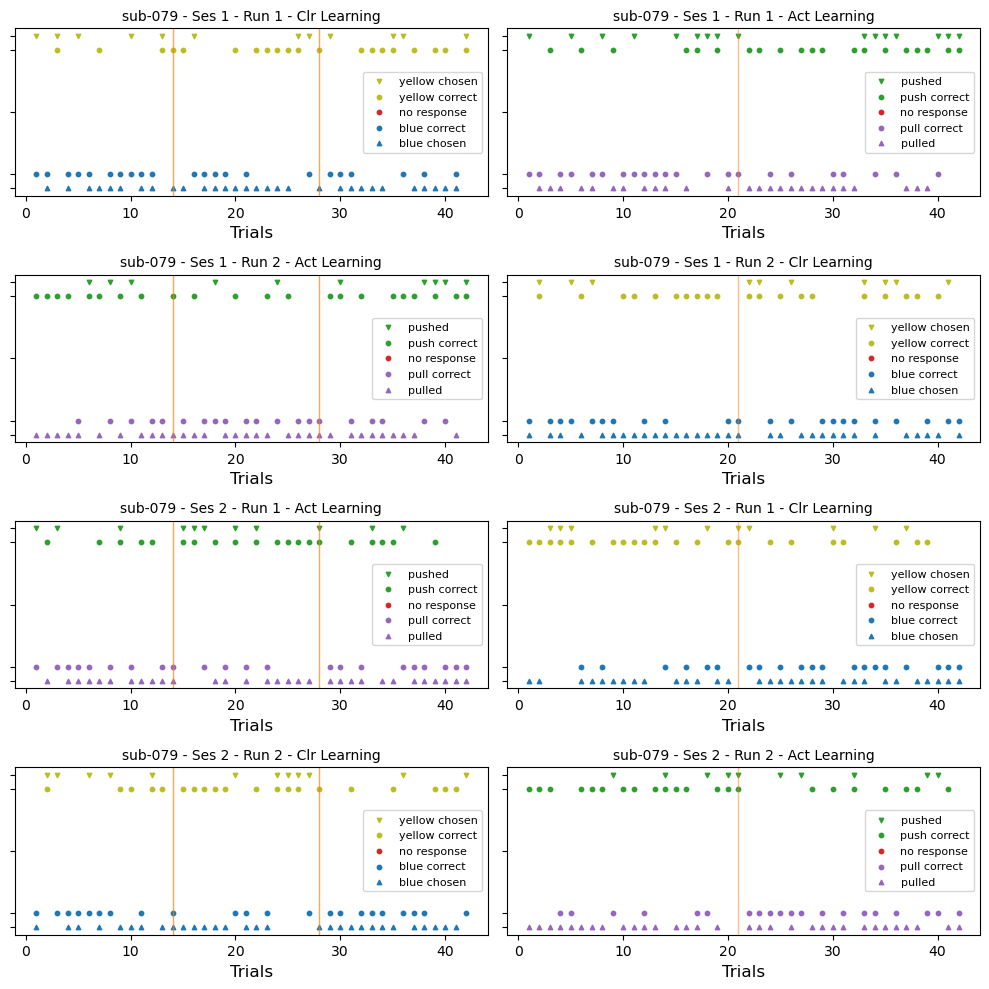

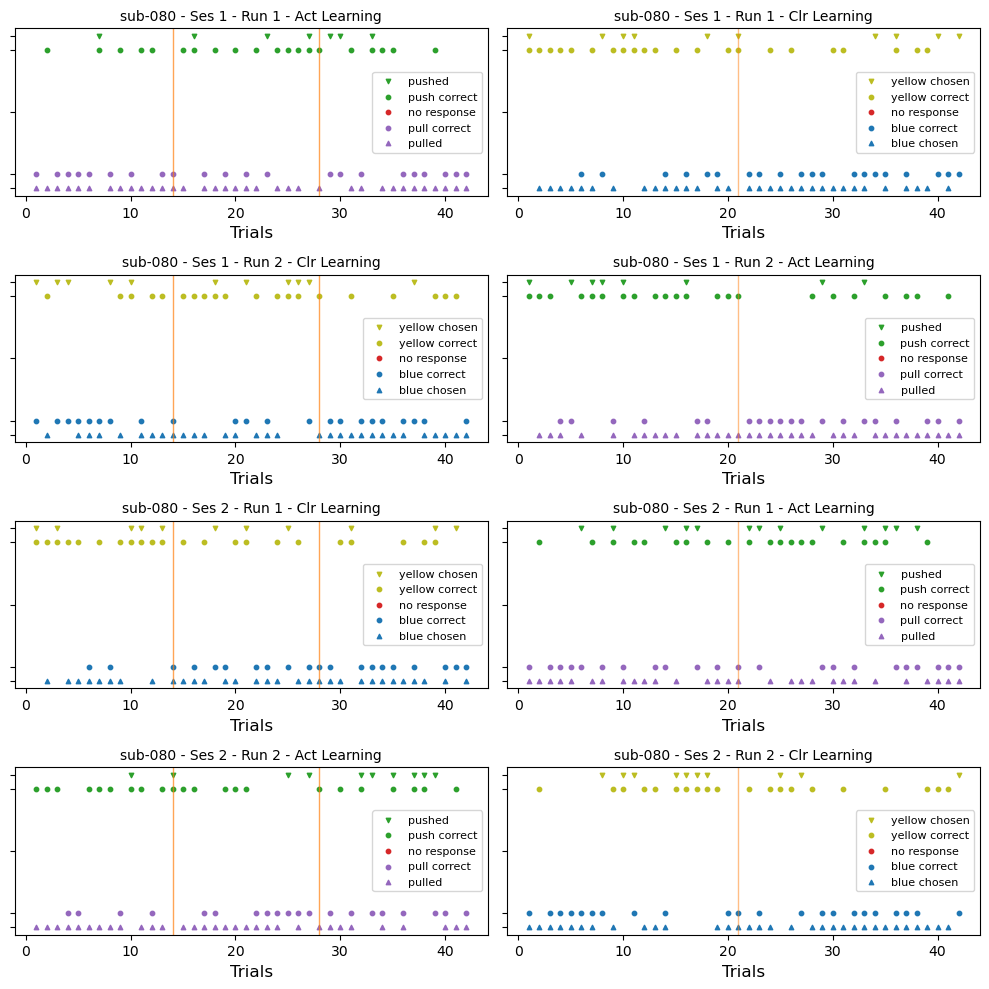

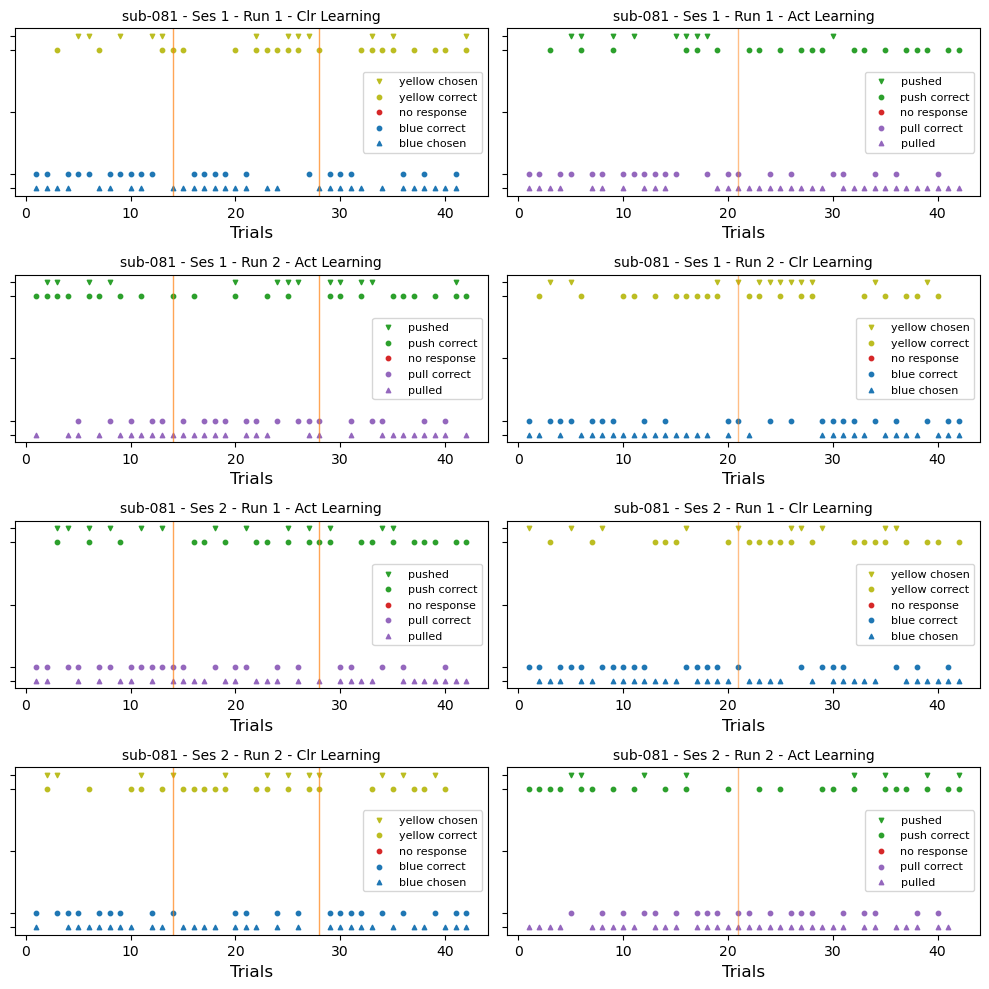

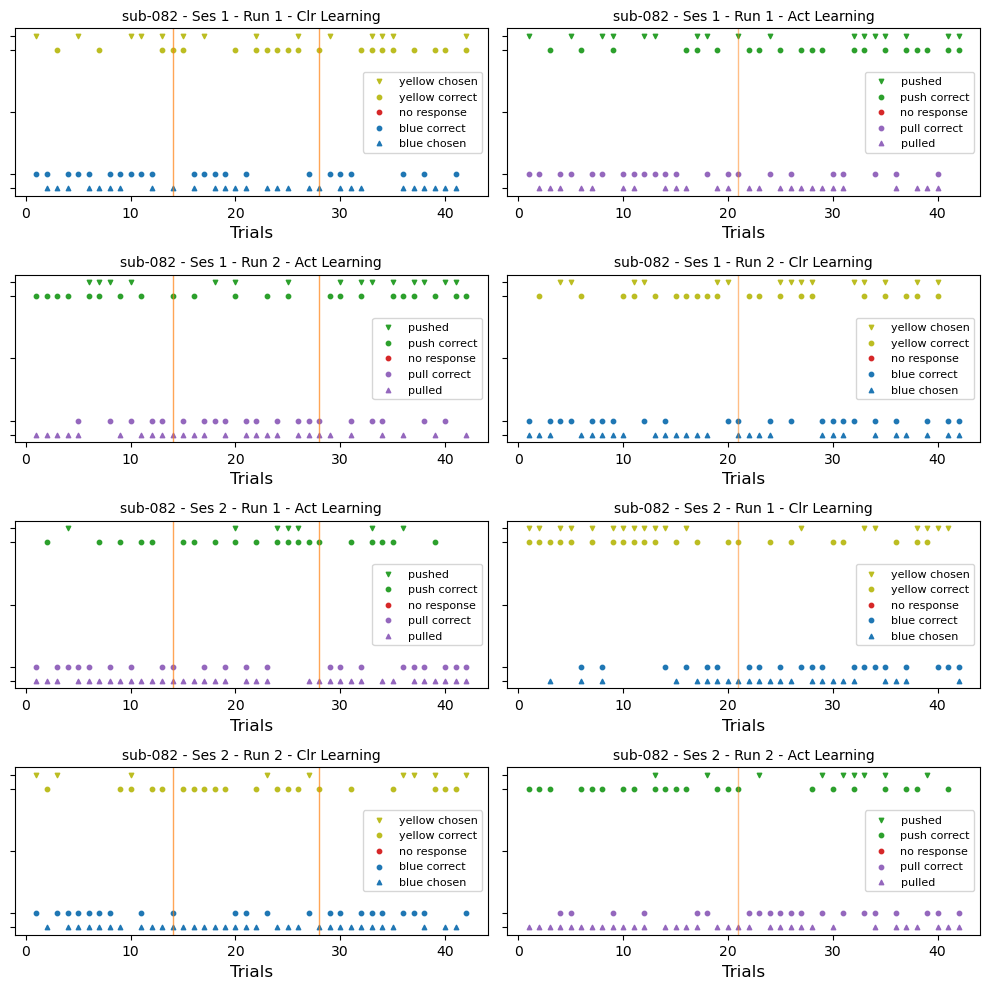

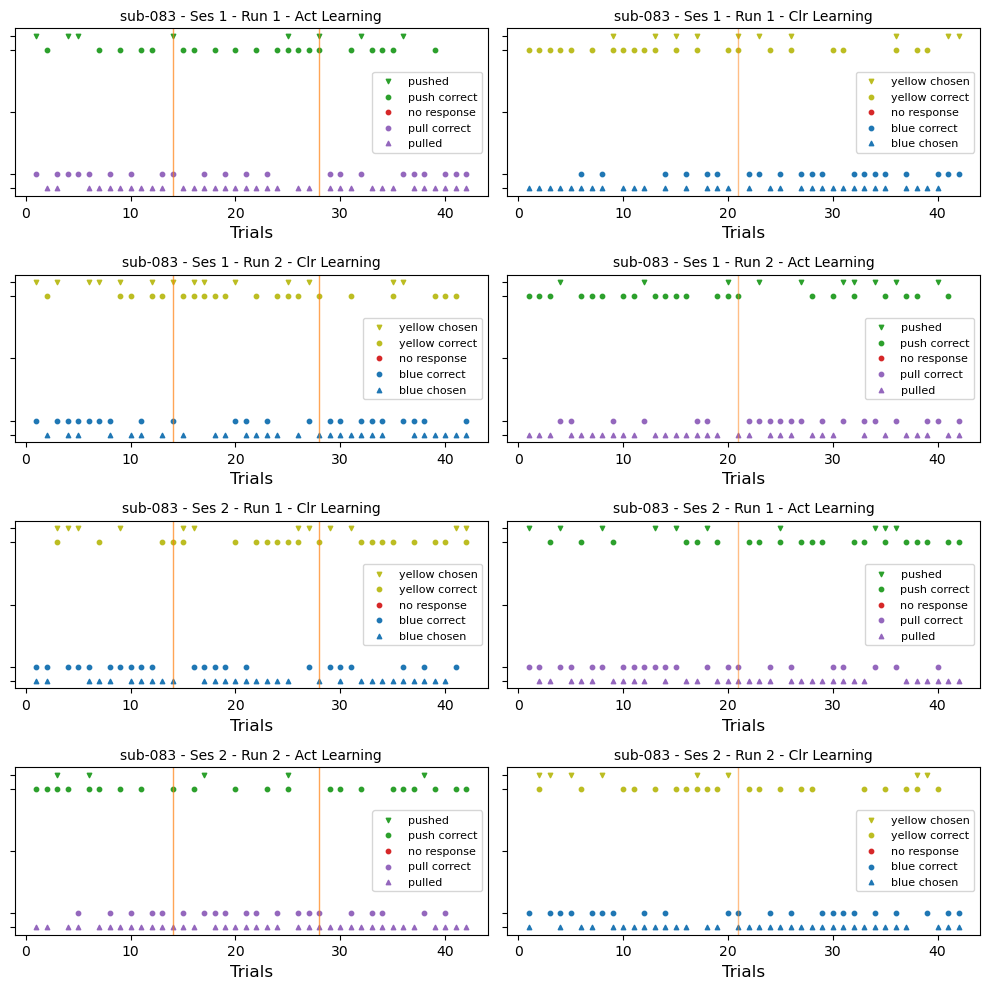

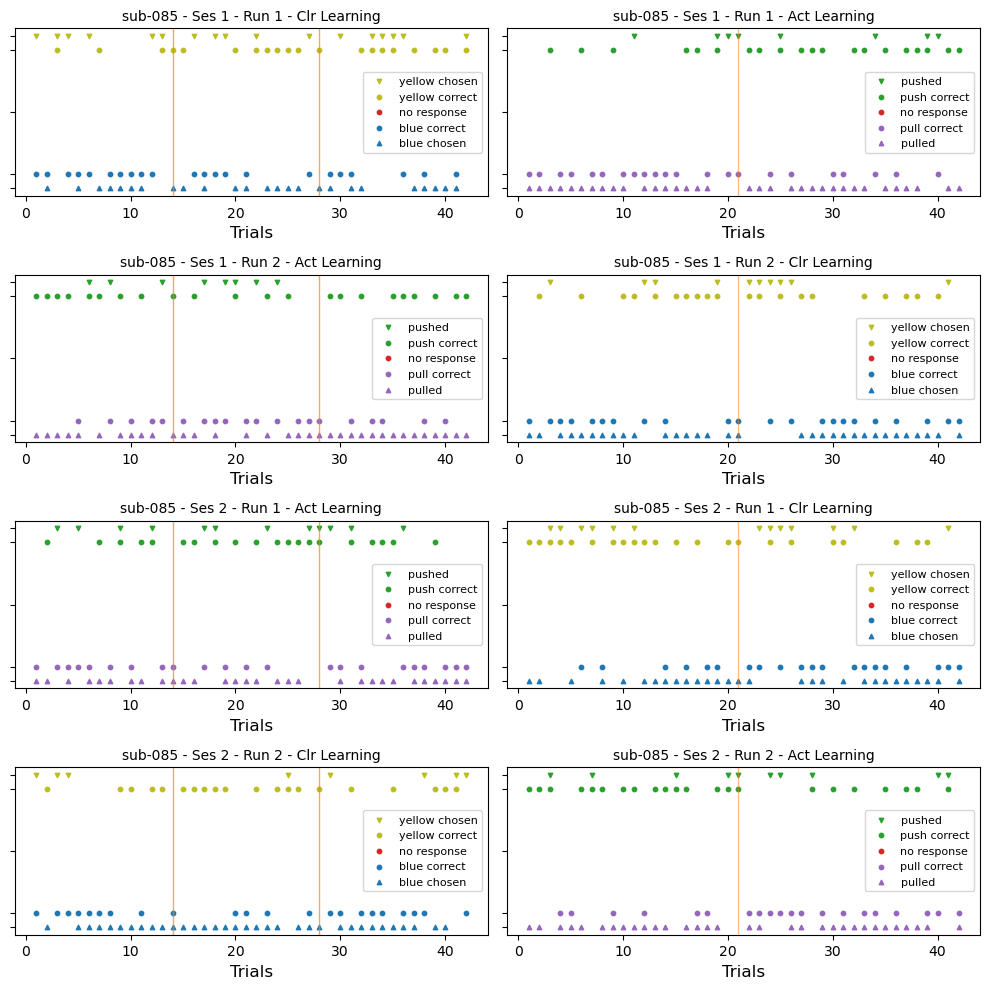

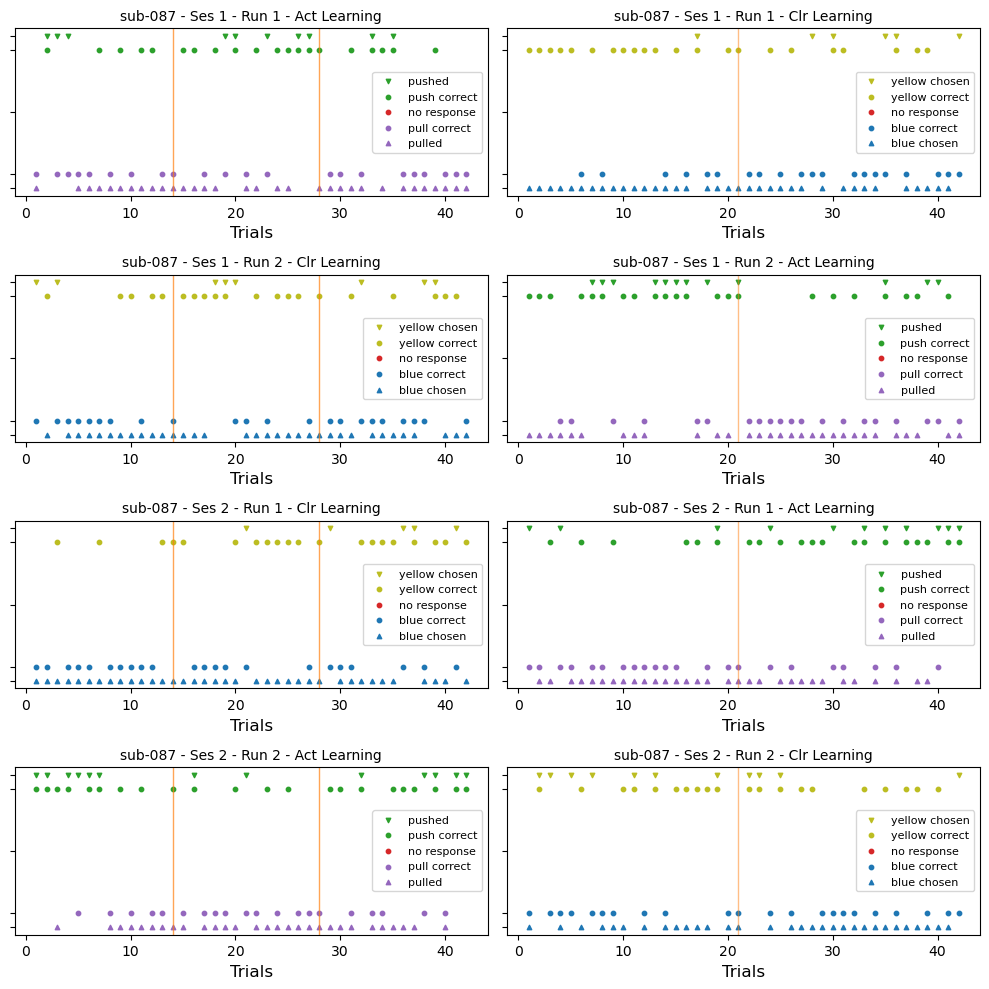

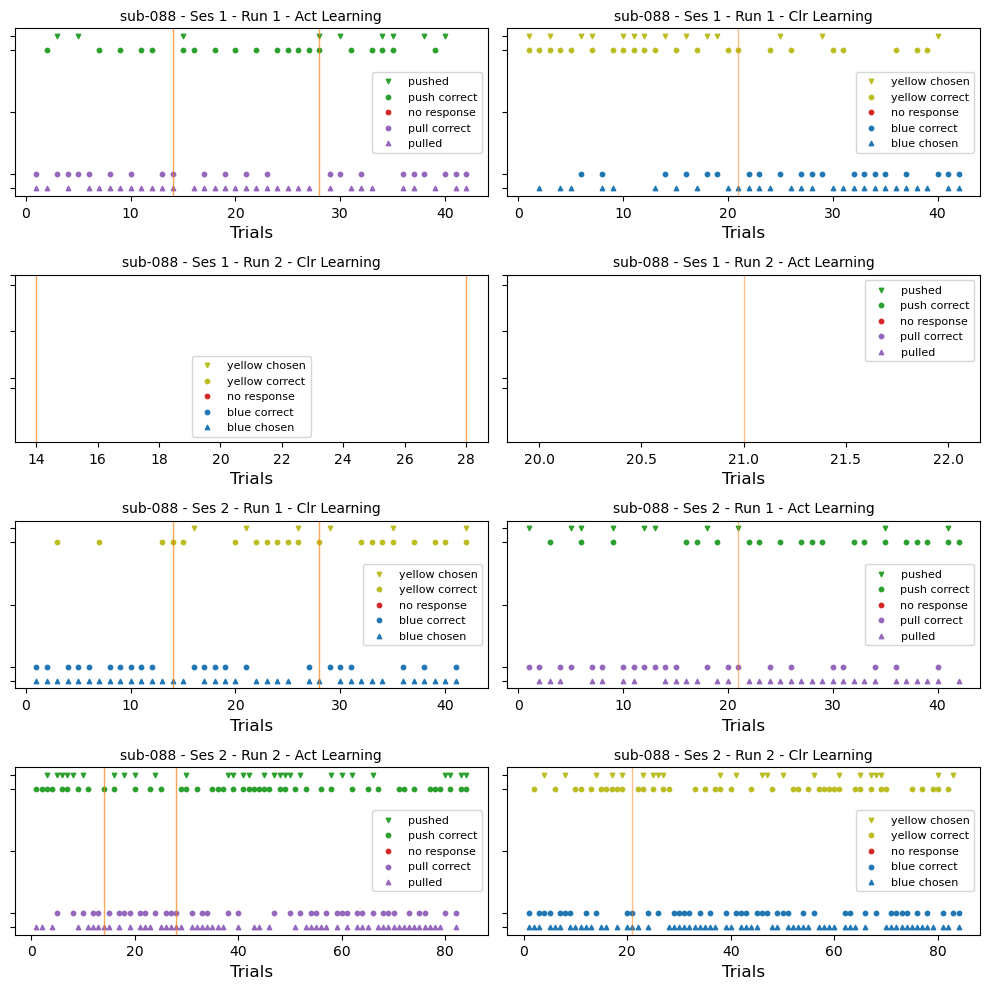

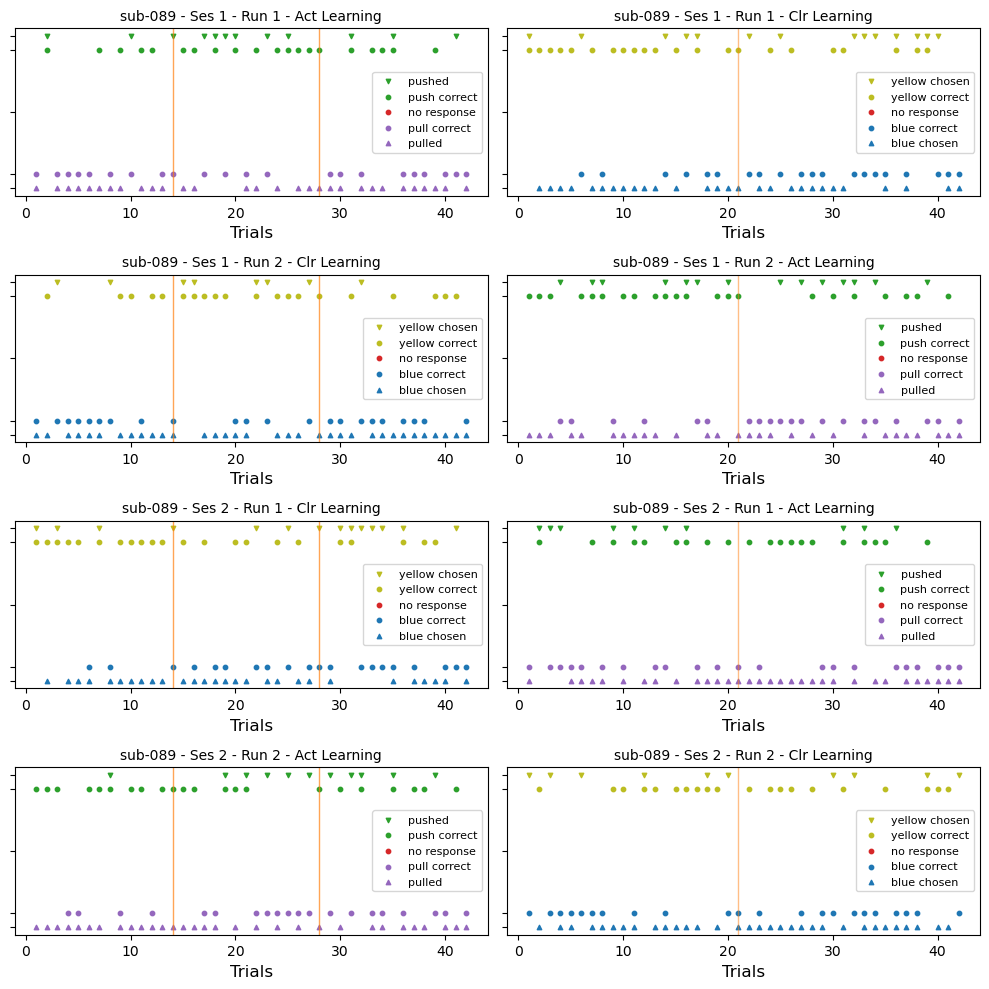

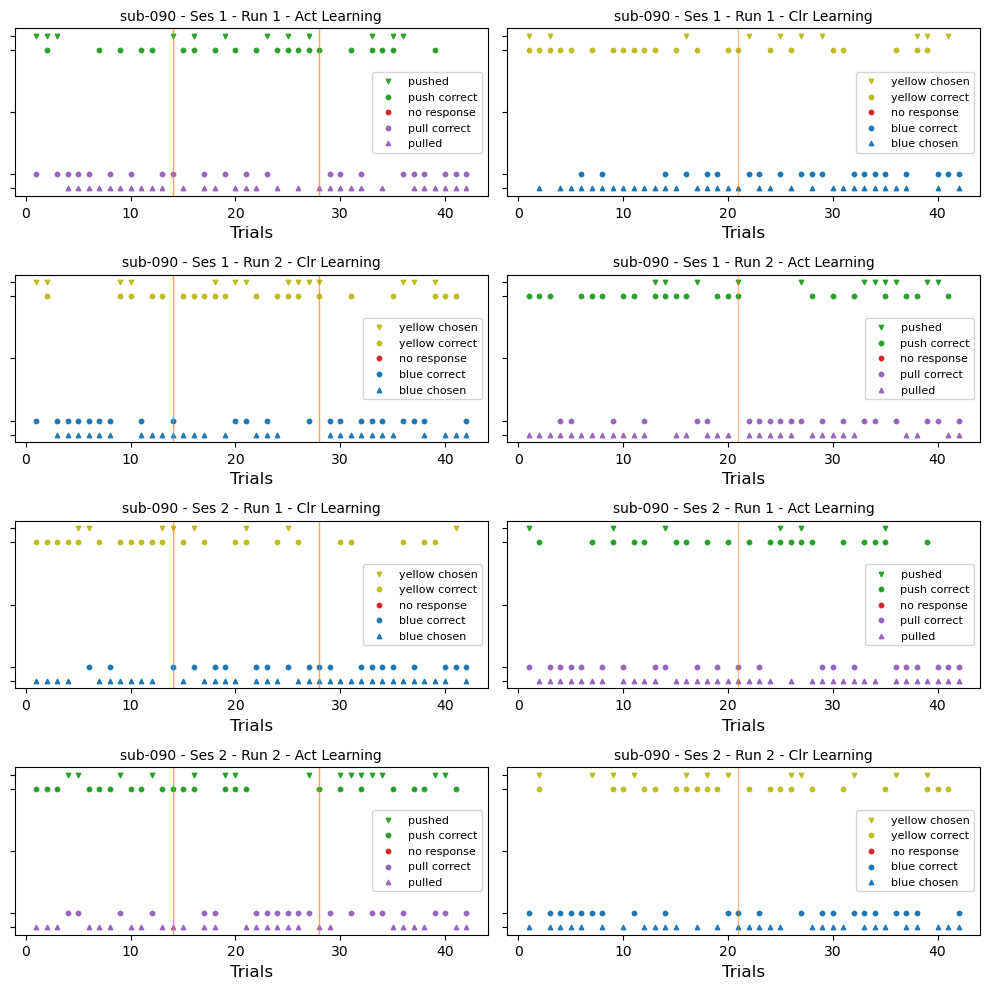

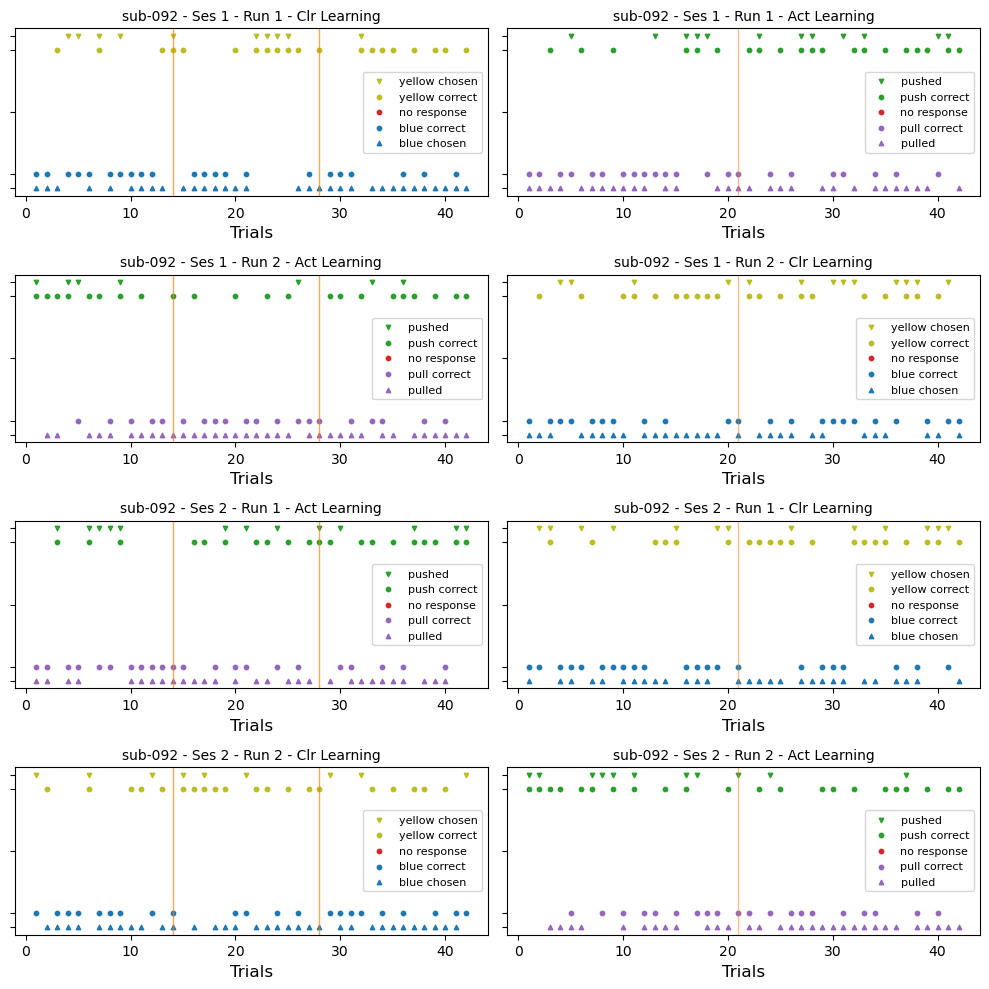

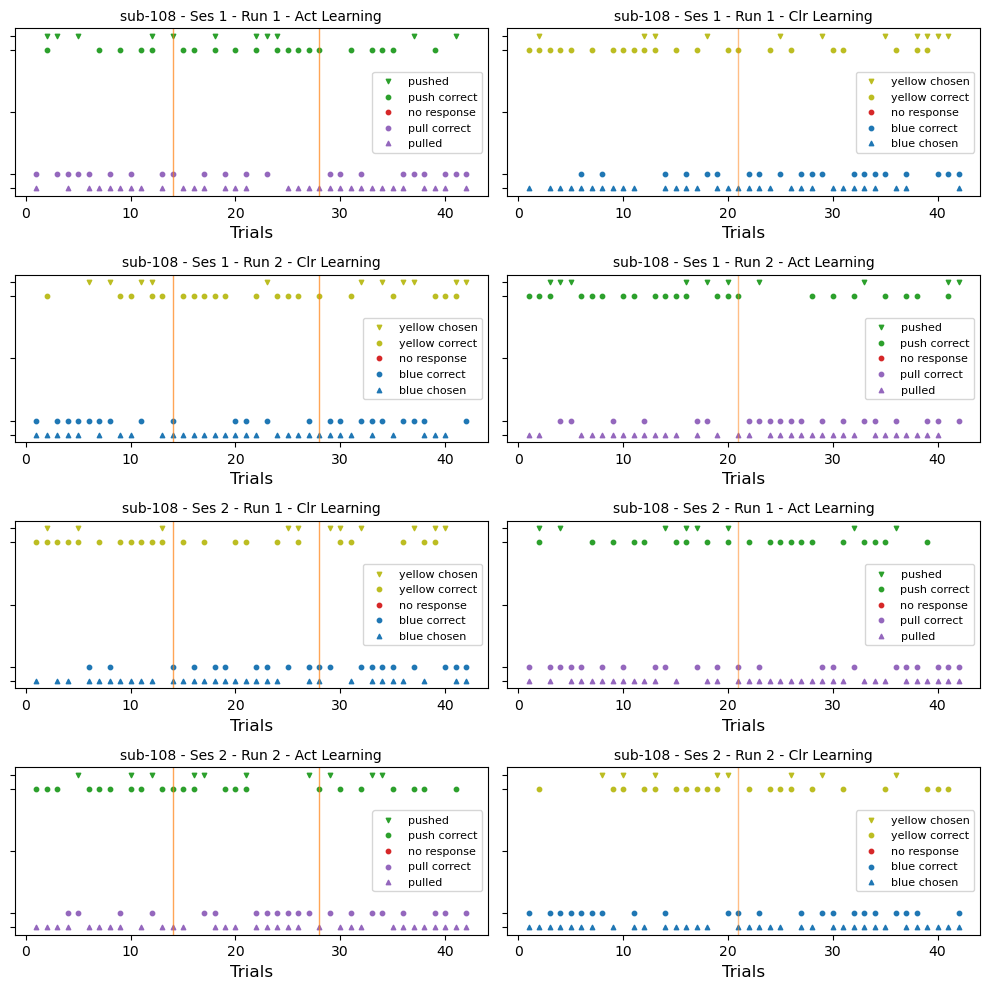

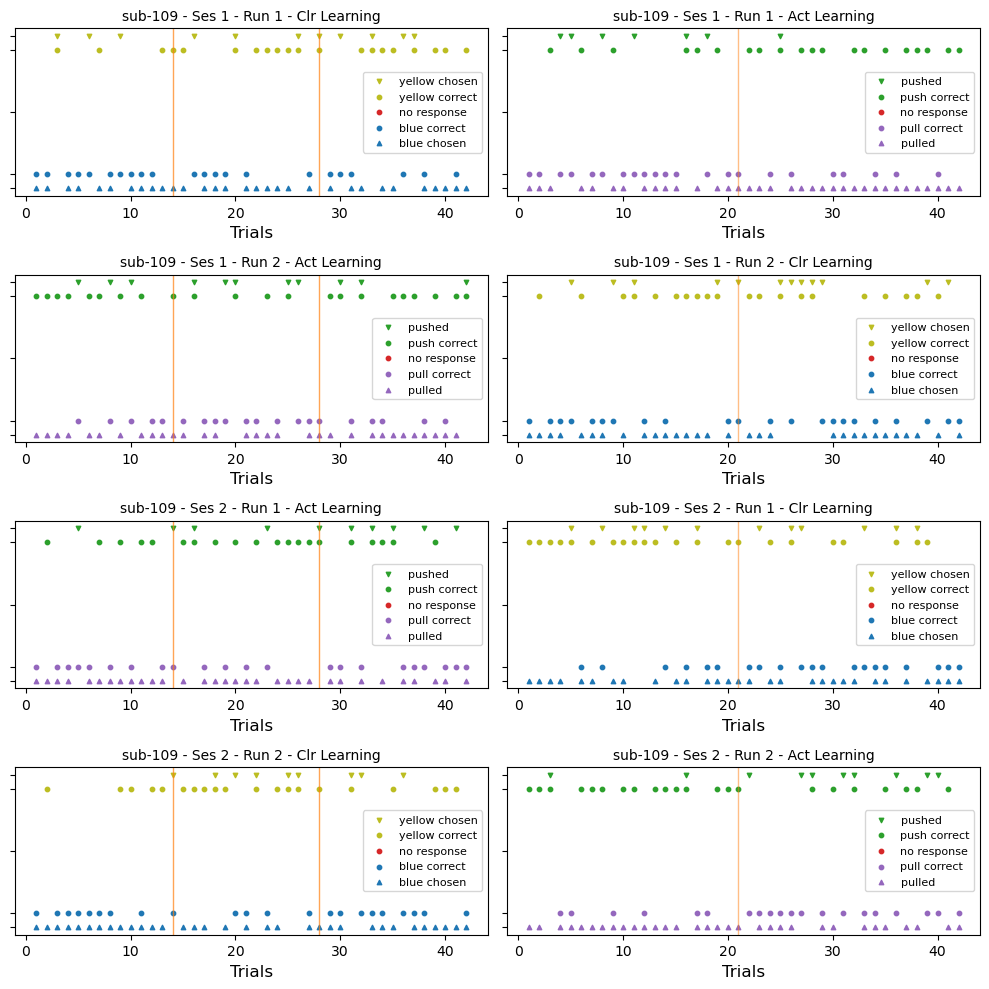

In [8]:
"""Plots of choice responses for each individuals"""

# The simuluation number
simNumber = 10
# List of subjects
subList = ['sub-004', 'sub-010', 'sub-012', 'sub-025', 'sub-026', 'sub-029', 'sub-030',
           'sub-033', 'sub-034', 'sub-036', 'sub-040', 'sub-041', 'sub-042', 'sub-045',
           'sub-047', 'sub-048', 'sub-052', 'sub-054', 'sub-056', 'sub-059', 'sub-060',
           'sub-064', 'sub-065', 'sub-067', 'sub-069', 'sub-070', 'sub-071', 'sub-074',
           'sub-075', 'sub-076', 'sub-077', 'sub-078', 'sub-079', 'sub-080', 'sub-081',
           'sub-082', 'sub-083', 'sub-085', 'sub-087', 'sub-088', 'sub-089', 'sub-090',
           'sub-092', 'sub-108', 'sub-109']

# Labeling Group level for each participant
randomGroupLabel = pd.read_csv('/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/randomGroupLabel.csv')
# Dataframe for concatenating data
dataAll = pd.DataFrame([])
# Loop over list of participatns
for subName in subList:
    # Main directory of the simupated participatns
    subMainDirec = '/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/simulation/' 
    # Directory of the especifit simulated participant
    dirc = subMainDirec + subName + '/' + str(simNumber) + '/' + subName + '-simulated-data-with-task-design-true-param.csv'
    # Read the simulated participant
    data = pd.read_csv(dirc)
    
    #save file name
    saveFile = subMainDirec + subName + '/' + str(simNumber) + '/' + subName + '_behData'
    plots.plotChosenCorrect(data = data, subName = subName, saveFile = saveFile)
    